In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import sklearn
import statsmodels
import statsmodels.api as sm

**Read the data from the '.csv' file as a monthly Time Series.**

In [2]:
# creating pandas.df
df = pd.read_csv('Sparkling.csv')

In [310]:
# First few rows of the dataset
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [311]:
# Last few rows of the dataset
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

**Creating the Time Stamps and adding to the data frame to make it a Time Series Data**

In [312]:
Time_Stamp = pd.date_range(start='1/1/1980', periods=len(df), freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [313]:
df['Time_Stamp'] = Time_Stamp
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [314]:
df.set_index(keys='Time_Stamp',inplace=True)
df

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471
...              ...        ...
1995-03-31   1995-03       1897
1995-04-30   1995-04       1862
1995-05-31   1995-05       1670
1995-06-30   1995-06       1688
1995-07-31   1995-07       2031

[187 rows x 2 columns]

In [315]:
df.drop('YearMonth', axis=1, inplace=True)
df

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

[187 rows x 1 columns]

**Check the basic measures of descriptive statistics**

In [316]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

**Check for missing values**

In [317]:
df.isnull().sum()

Sparkling    0
dtype: int64

**Plot the Time Series to understand the behaviour of the data.**

In [318]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] =  14,7

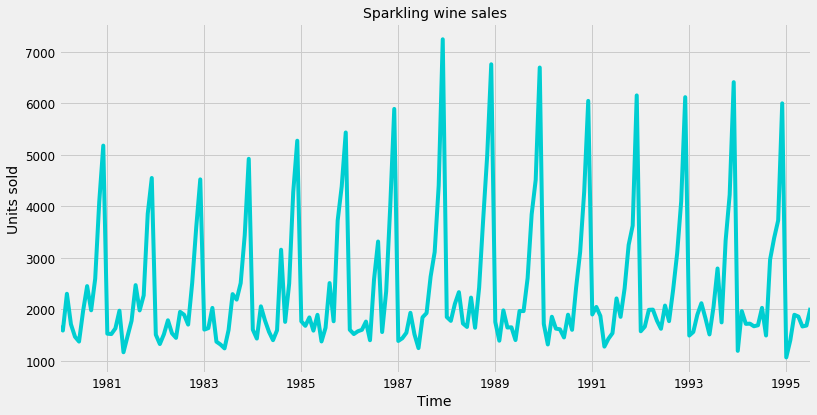

In [319]:
plt.figure(figsize = (12, 6))
df.Sparkling.plot(color='darkturquoise')
plt.title('Sparkling wine sales', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units sold');

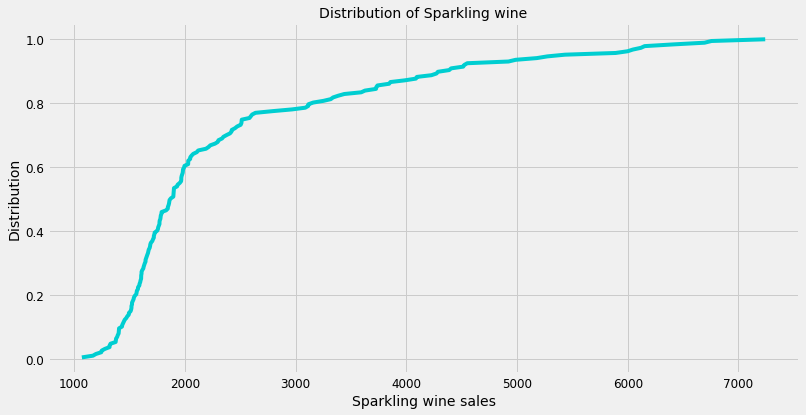

In [320]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 6))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'darkturquoise')
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sparkling wine sales')
plt.ylabel('Distribution');

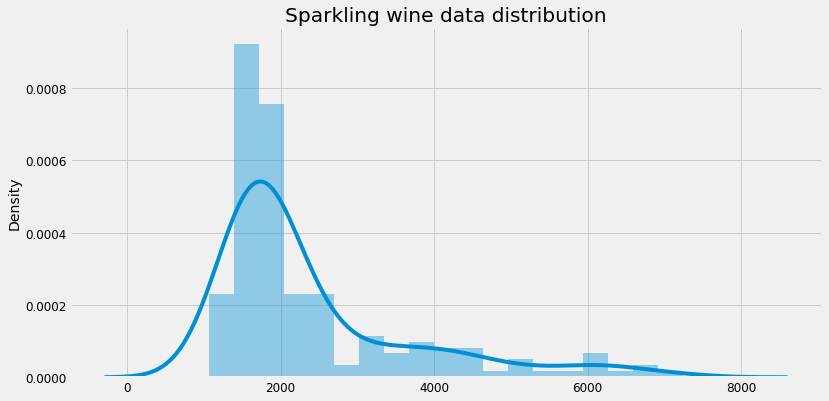

In [321]:
plt.figure(figsize = (12, 6))
sns.distplot(df);
plt.title('Sparkling wine data distribution');

Data is skewed

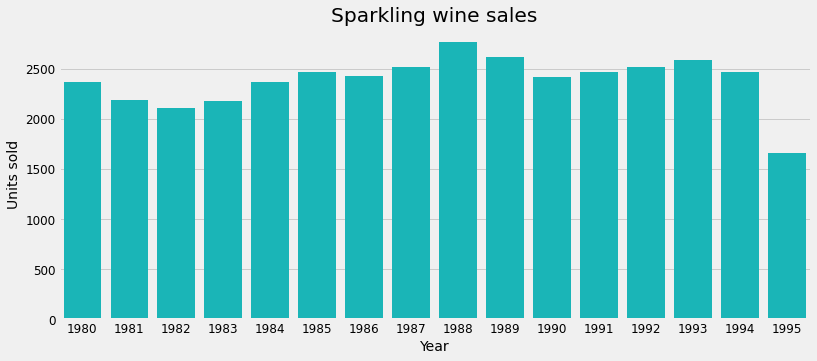

In [322]:
plt.figure(figsize=(12,5))
sns.barplot(df.index.year,df['Sparkling'], color = 'darkturquoise', ci=None)
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Sparkling wine sales')
plt.show();

Data seems to have more or less same sales across the year. 1988 has recorded maximum sales

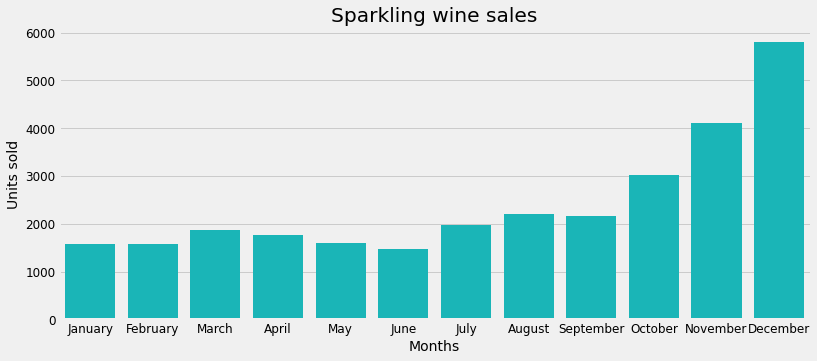

In [323]:
plt.figure(figsize=(12,5))
sns.barplot(df.index.month_name(),df['Sparkling'], color = 'darkturquoise', ci=None)
plt.xlabel('Months')
plt.ylabel('Units sold')
plt.title('Sparkling wine sales')
plt.show()

December has best sales across all months followed by November and Oct, may be due to the year-end parties

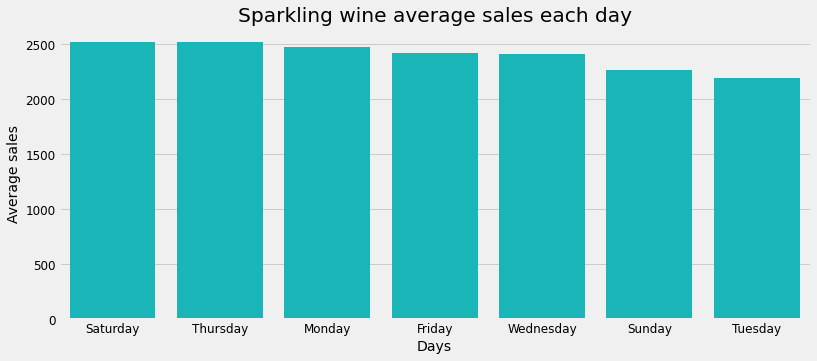

In [324]:
plt.figure(figsize=(12,5))
Tot_mean=df.groupby(df.index.day_name()).mean().reset_index()
Tot_mean=Tot_mean.sort_values(by='Sparkling',ascending=False)
sns.barplot(Tot_mean['Time_Stamp'],Tot_mean['Sparkling'], color = 'darkturquoise')
plt.xlabel('Days')
plt.ylabel('Average sales')
plt.title('Sparkling wine average sales each day')
plt.show();

Saturday registers highest average sales of the week

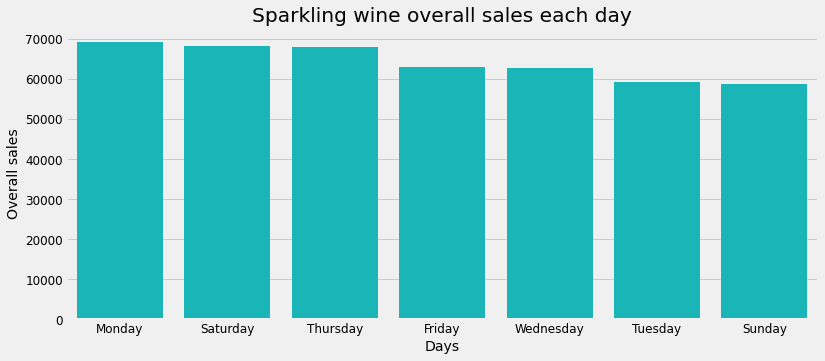

In [325]:
plt.figure(figsize=(12,5))
Tot_sum=df.groupby(df.index.day_name()).sum().reset_index()
Tot_sum=Tot_sum.sort_values(by='Sparkling',ascending=False)
sns.barplot(Tot_sum['Time_Stamp'],Tot_sum['Sparkling'], color = 'darkturquoise')
plt.xlabel('Days')
plt.ylabel('Overall sales')
plt.title('Sparkling wine overall sales each day')
plt.show();

Monday has the highest overall sales 

**Make a boxplot to understand the spread of wine sales across different years and within different months across years.**

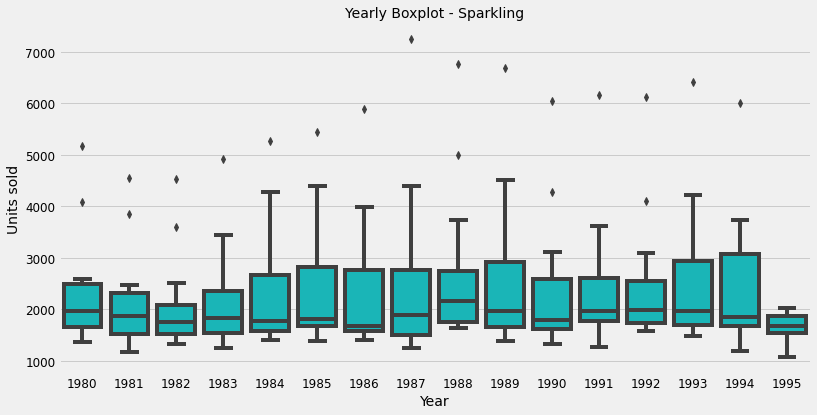

In [326]:
# Yearly boxplot
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.year,y = df['Sparkling'], color = 'darkturquoise')
plt.title('Yearly Boxplot - Sparkling', fontsize=14);
plt.xlabel('Year')
plt.ylabel('Units sold');

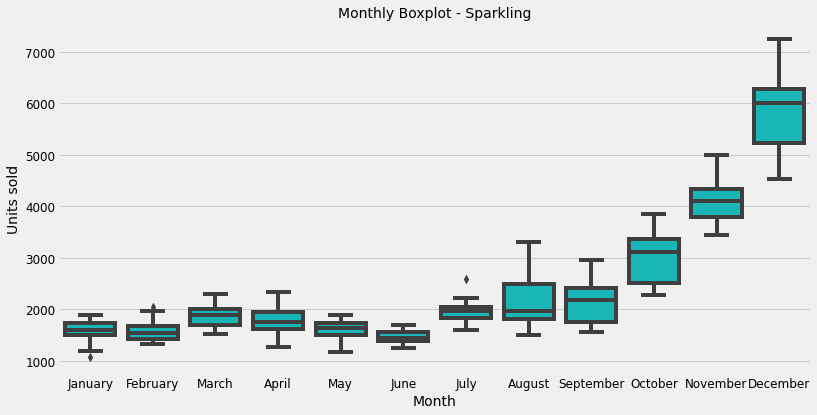

In [327]:
# Monthly boxplot
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'], color = 'darkturquoise')
plt.title('Monthly Boxplot - Sparkling', fontsize=14);
plt.xlabel('Month')
plt.ylabel('Units sold');

**Plot a time series monthplot to understand the spread of sales across different years and within different months across years.**

<Figure size 864x432 with 0 Axes>

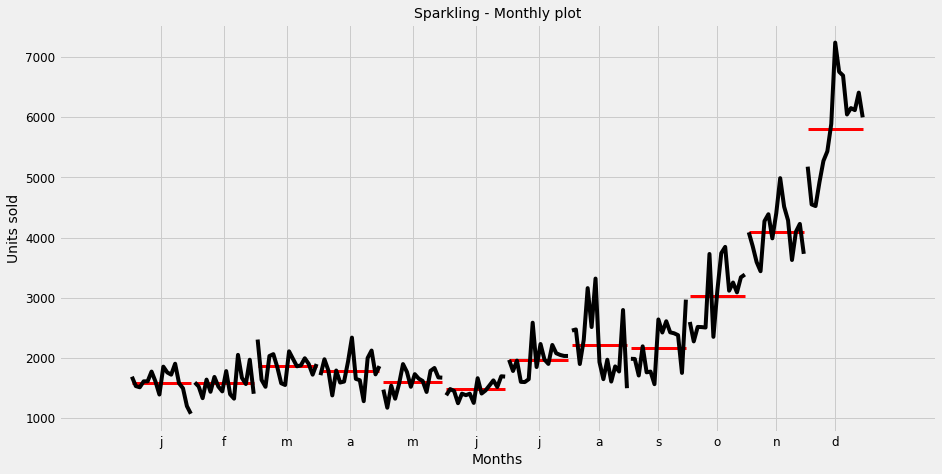

In [328]:
from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize = (12, 6))
month_plot(df['Sparkling'])
plt.title('Sparkling - Monthly plot', fontsize = 14)
plt.xlabel('Months')
plt.ylabel('Units sold');

This plot shows us the behaviour of the Time Series across various months. The red line is the median value.

**Plot a graph of monthly sales across years.**

In [329]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month.rename('Months'), index = df.index.year.rename('Years'))
monthly_sales_across_years

Months      1       2       3       4   ...      9       10      11      12
Years                                   ...                                
1980    1686.0  1591.0  2304.0  1712.0  ...  1984.0  2596.0  4087.0  5179.0
1981    1530.0  1523.0  1633.0  1976.0  ...  1981.0  2273.0  3857.0  4551.0
1982    1510.0  1329.0  1518.0  1790.0  ...  1706.0  2514.0  3593.0  4524.0
1983    1609.0  1638.0  2030.0  1375.0  ...  2191.0  2511.0  3440.0  4923.0
1984    1609.0  1435.0  2061.0  1789.0  ...  1759.0  2504.0  4273.0  5274.0
1985    1771.0  1682.0  1846.0  1589.0  ...  1771.0  3727.0  4388.0  5434.0
1986    1606.0  1523.0  1577.0  1605.0  ...  1562.0  2349.0  3987.0  5891.0
1987    1389.0  1442.0  1548.0  1935.0  ...  2638.0  3114.0  4405.0  7242.0
1988    1853.0  1779.0  2108.0  2336.0  ...  2421.0  3740.0  4988.0  6757.0
1989    1757.0  1394.0  1982.0  1650.0  ...  2608.0  3845.0  4514.0  6694.0
1990    1720.0  1321.0  1859.0  1628.0  ...  2424.0  3116.0  4286.0  6047.0
1991    1902.0  2049.0  1874.0  1279.0  ...  2408.0  3252.0  3627.0  6153.0
1992    1577.0  1667.0  1993.0  1997.0  ...  2377.0  3088.0  4096.0  6119.0
1993    1494.0  1564.0  1898.0  2121.0  ...  1749.0  3339.0  4227.0  6410.0
1994    1197.0  1968.0  1720.0  1725.0  ...  2968.0  3385.0  3729.0  5999.0
1995    1070.0  1402.0  1897.0  1862.0  ...     NaN     NaN     NaN     NaN

[16 rows x 12 columns]

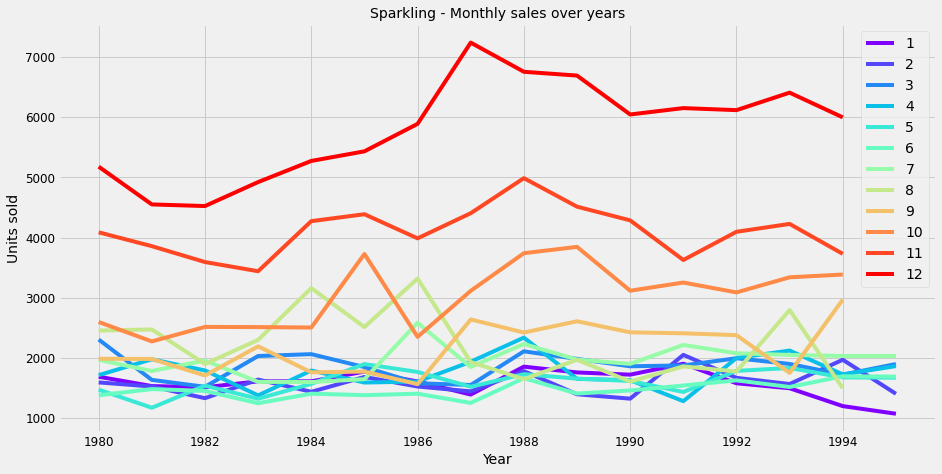

In [330]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Monthly sales over years', fontsize=14);

**Plot the average sales per month and the month on month percentage change of sales.**

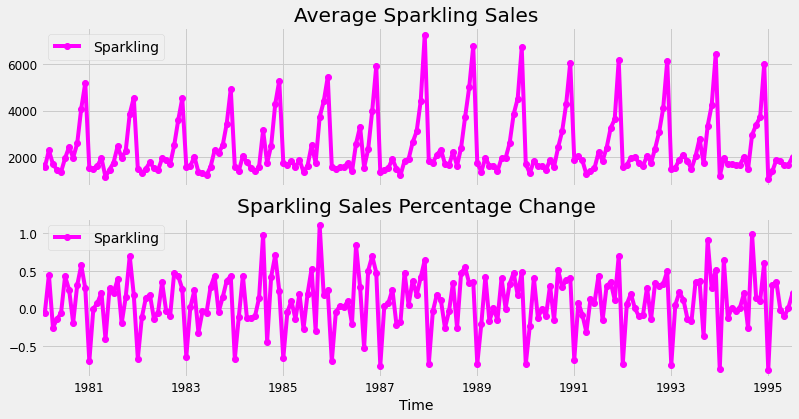

In [331]:
# group by date and get average Rose sales with precentage change
average_r    = df.groupby(df.index)['Sparkling'].mean()
pct_change_r = df.groupby(df.index)['Sparkling'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(12,6))

# plot average Rose sales over time(year-month)
ax2 = average_r.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales", color = 'magenta')
# plot precent change for Sales over time(year-month)
ax3 = pct_change_r.plot(legend=True,ax=axis2,marker='o',color='magenta',title="Sparkling Sales Percentage Change")
plt.xlabel('Time')
plt.legend(loc='best');

**Decompose the Time Series and plot the different components.**

If the seasonality and residual components are independent of the trend, then you have an additive series. If the seasonality and residual components are in fact dependent, meaning they fluctuate on trend, then you have a multiplicative series.

In [332]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

**Additive Decomposition**

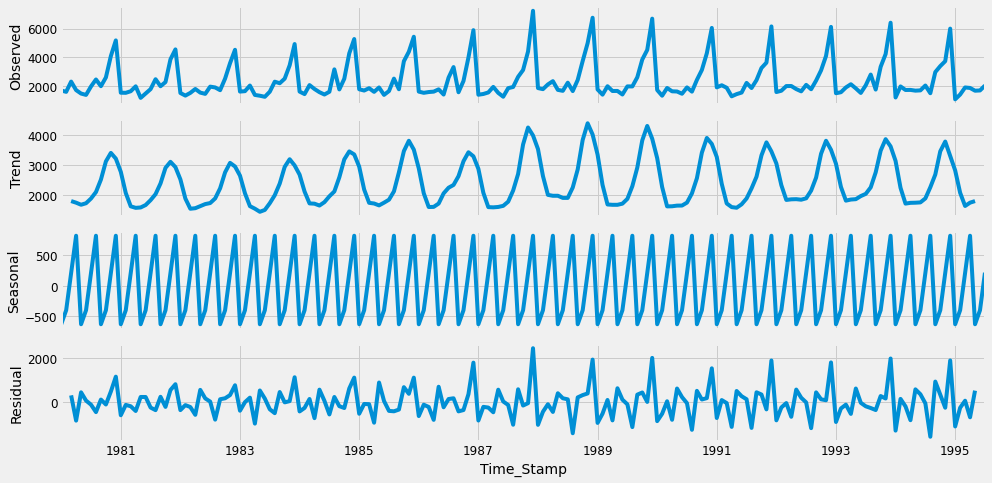

In [333]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive', freq=4)
decomposition.plot();

In [334]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31    1796.375
1980-04-30    1742.750
1980-05-31    1673.750
1980-06-30    1724.125
1980-07-31    1880.875
1980-08-31    2097.375
1980-09-30    2514.875
1980-10-31    3120.750
1980-11-30    3404.750
1980-12-31    3213.875
Name: Sparkling, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -633.469867
1980-02-29   -402.919203
1980-03-31    214.445894
1980-04-30    821.943176
1980-05-31   -633.469867
1980-06-30   -402.919203
1980-07-31    214.445894
1980-08-31    821.943176
1980-09-30   -633.469867
1980-10-31   -402.919203
1980-11-30    214.445894
1980-12-31    821.943176
Name: Sparkling, dtype: float64 

Residual 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31     293.179106
1980-04-30    -852.693176
1980-05-31     430.719867
1980-06-30      55.794203
1980-07-31    -129.320894
1980-08-31    -466.318176
1980-09-30     102.594867
1980-10-31    -121.830797
1980-11-30     467.804106
1980

In [335]:
detrend_ts = seasonality + residual
#deaseasonalized_ts.head(12)

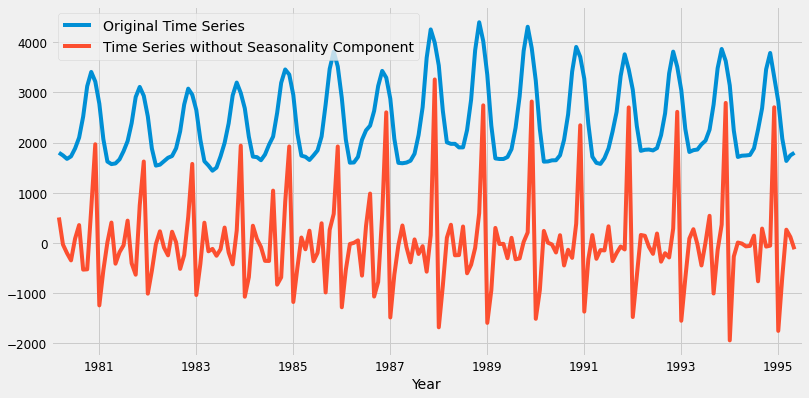

In [336]:
#df.Sparkling.plot()
plt.figure(figsize = (12, 6))
trend.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);
plt.xlabel('Year');

**Multiplicative decomposition**

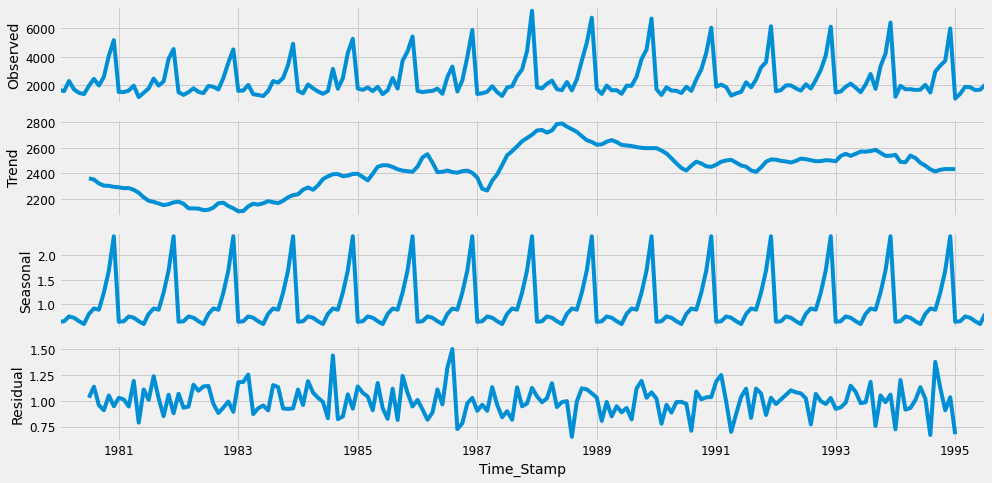

In [337]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [338]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: Sparkling, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: Sparkling, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Na

In [339]:
detrend_ts = seasonality + residual
#deaseasonalized_ts.head(12)

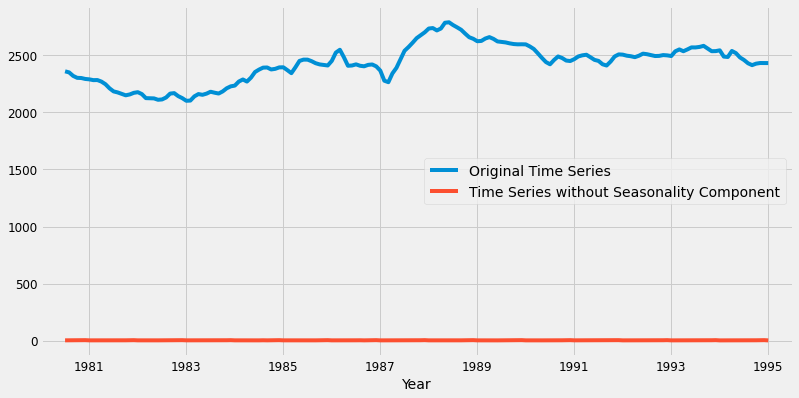

In [340]:
#df.Sparkling.plot()
plt.figure(figsize = (12, 6))
trend.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);
plt.xlabel('Year');

**Split the time series**

In [341]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [342]:
from IPython.display import display

In [343]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [344]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


**Plotting data split**

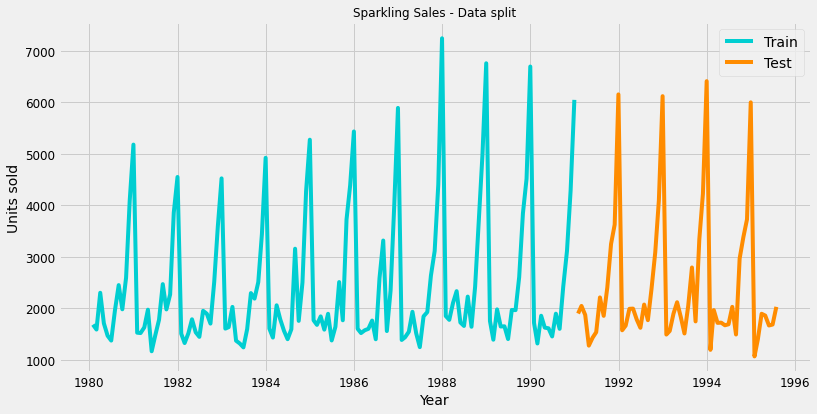

In [345]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sparkling'], label = 'Train', color='darkturquoise')
plt.plot(test['Sparkling'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show;

**Model 1: Linear Regression**

In [346]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [347]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [348]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [349]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [350]:
LinearRegression_train['RegOnTime_spark'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_spark'] = lr.predict(LinearRegression_test[['time']])

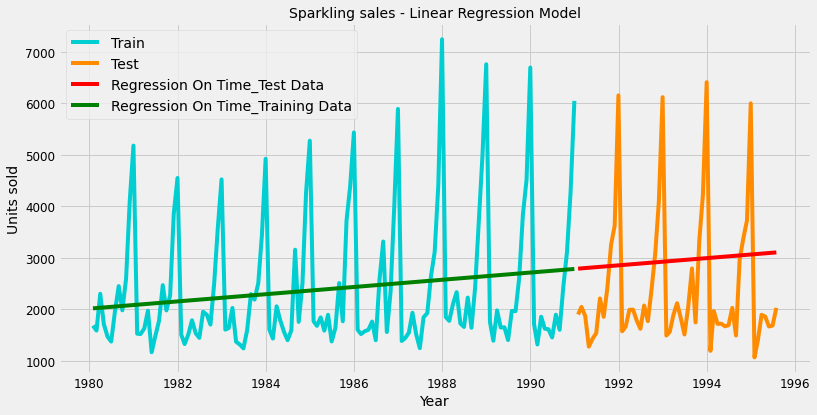

In [351]:
plt.figure(figsize = (12, 6))
plt.plot( train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Sparkling sales - Linear Regression Model', fontsize = 14);

**Model Evaluation**

In [352]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [353]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime_spark'],squared=False)
mape_spark_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_train, mape_spark_model1_train))

For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [354]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime_spark'],squared=False)
mape_spark_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_test, mape_spark_model1_test))

For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is 1389.135 and MAPE is 50.15


In [355]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_spark_model1_test],'Test MAPE': [mape_spark_model1_test]},index=['RegressionOnTime'])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

**Model 2: Naive forecast**

In [356]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [357]:
NaiveModel_train['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: spark_naive, dtype: int64

In [358]:
NaiveModel_test['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: spark_naive, dtype: int64

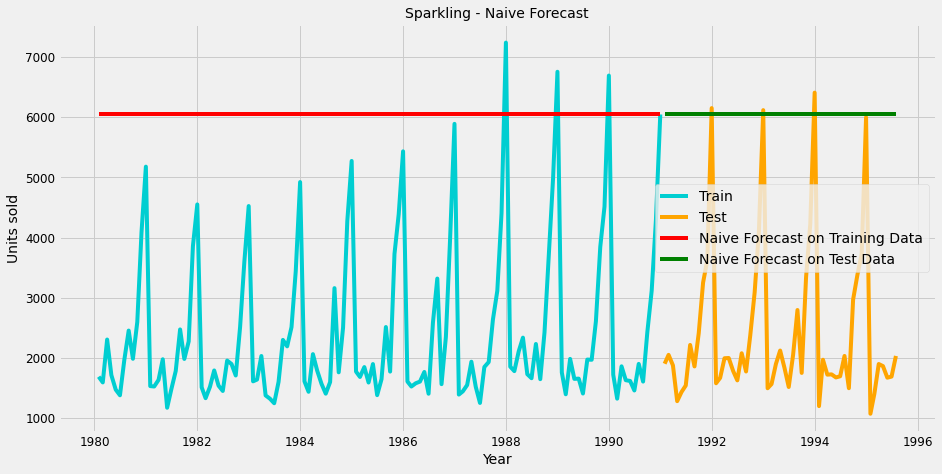

In [359]:
#plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14);

**Model evaluation**

In [360]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['spark_naive'],squared=False)
mape_spark_model2_train = MAPE(train['Sparkling'],NaiveModel_train['spark_naive'])
print("For Naive forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_train, mape_spark_model2_train))

For Naive forecast on the Sparkling Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [361]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
mape_spark_model2_test = MAPE(test['Sparkling'],NaiveModel_test['spark_naive'])
print("For Naive forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_test, mape_spark_model2_test))

For Naive forecast on the Sparkling Testing Data:  RMSE is 3864.279 and MAPE is 152.87


In [362]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model2_test],'Test MAPE': [mape_spark_model2_test]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

**Model 3: Simple Average**

In [363]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [364]:
SimpleAverage_train['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

Time_Stamp
1980-01-31    2403.780303
1980-02-29    2403.780303
1980-03-31    2403.780303
1980-04-30    2403.780303
1980-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

In [365]:
SimpleAverage_test['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

Time_Stamp
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

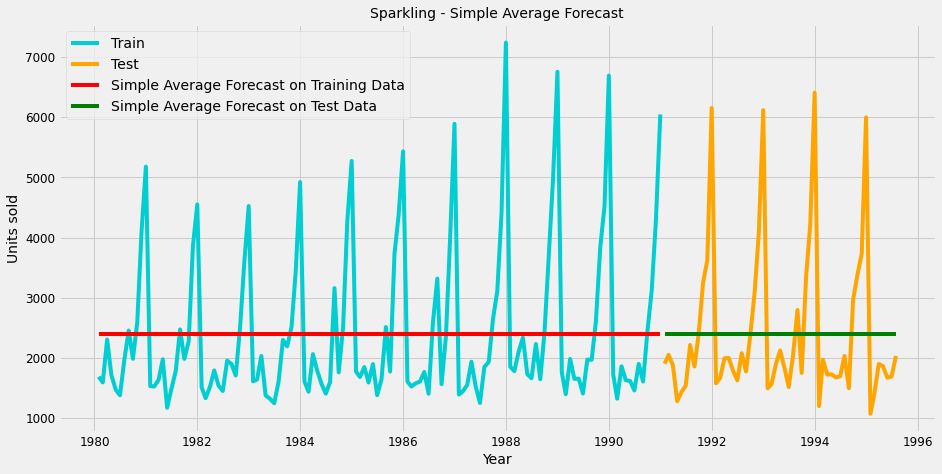

In [366]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='Simple Average Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='Simple Average Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title("Sparkling - Simple Average Forecast", fontsize=14);

**Model Evaluation**

In [367]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'],squared=False)
mape_spark_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_train, mape_spark_model3_train))

For Simple Average forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [368]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
mape_spark_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_test, mape_spark_model3_test))

For Simple Average forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [369]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model3_test],'Test MAPE': [mape_spark_model3_test]},index=['SimpleAverage'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90

**Model 4: Moving Average**

In [370]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [371]:
MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Spark_Trailing_2  ...  Spark_Trailing_6  Spark_Trailing_9
Time_Stamp                               ...                                    
1980-01-31       1686               NaN  ...               NaN               NaN
1980-02-29       1591            1638.5  ...               NaN               NaN
1980-03-31       2304            1947.5  ...               NaN               NaN
1980-04-30       1712            2008.0  ...               NaN               NaN
1980-05-31       1471            1591.5  ...               NaN               NaN

[5 rows x 5 columns]

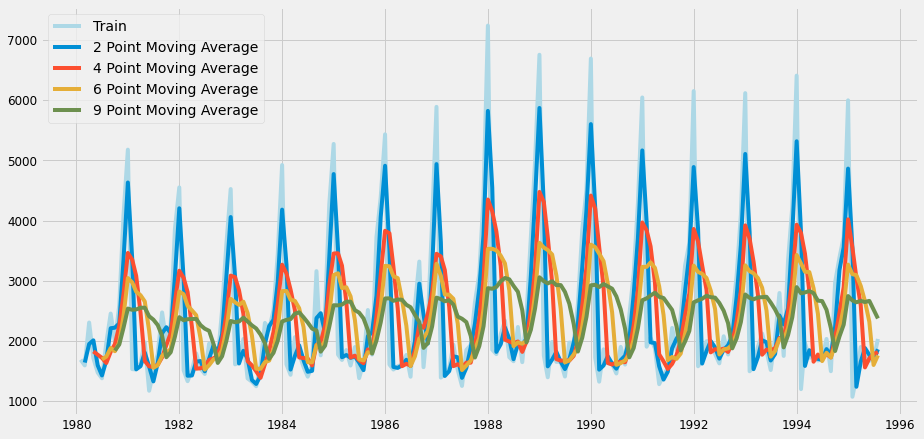

In [372]:
plt.plot(MovingAverage['Sparkling'], label='Train', color='lightblue')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best');

In [373]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

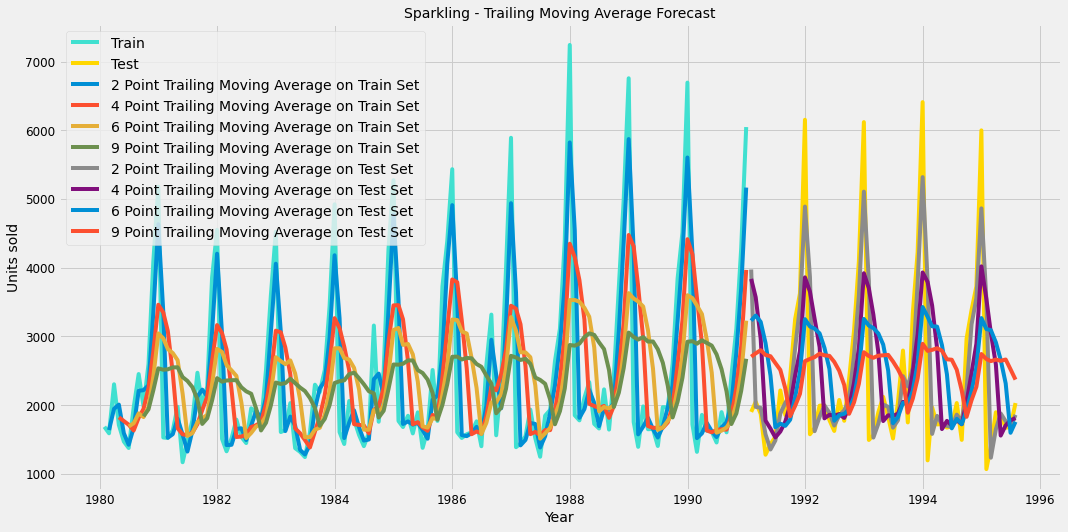

In [374]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year')
plt.ylabel('Units sold')

plt.title("Sparkling - Trailing Moving Average Forecast", fontsize=14);

**Model Evaluation**

In [375]:
## Test Data - rmse_spark and mape_spark --> 2 point Spark_Trailing MA

rmse_spark_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
mape_spark_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_2, mape_spark_model4_test_2))

## Test Data - rmse_spark and mape_spark --> 4 point Spark_Trailing MA

rmse_spark_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
mape_spark_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_4, mape_spark_model4_test_4))

## Test Data - rmse_spark and mape_spark --> 6 point Spark_Trailing MA

rmse_spark_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
mape_spark_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_6, mape_spark_model4_test_6))

## Test Data - rmse_spark and mape_spark --> 9 point Spark_Trailing MA

rmse_spark_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
mape_spark_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_9, mape_spark_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is 813.401 mape_spark is 19.70
For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is 1156.590 mape_spark is 35.96
For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is 1283.927 mape_spark is 43.86
For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is 1346.278 mape_spark is 46.86


In [376]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_model4_test_2,rmse_spark_model4_test_4
                                          ,rmse_spark_model4_test_6,rmse_spark_model4_test_9]
                            ,'Test MAPE': [mape_spark_model4_test_2,mape_spark_model4_test_4,
                                           mape_spark_model4_test_6,mape_spark_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86

**Model 5: Simple Exponential Smoothing**

In [377]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [378]:
SES_train = train.copy()
SES_test = test.copy()

In [379]:
SES_train['Sparkling'].head()

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
Name: Sparkling, dtype: int64

In [380]:
model = SimpleExpSmoothing(np.asarray(SES_train['Sparkling']))

Test: For alpha = 0.05,  RMSE is 1316.4117 MAPE is 45.50
For smoothing level = 0.05,  Initial level 1686.00


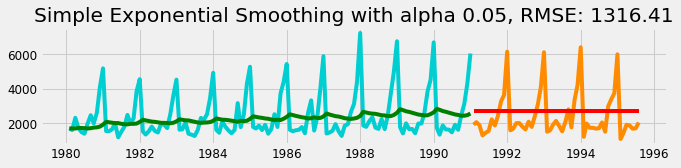

Test: For alpha = 0.10,  RMSE is 1375.3934 MAPE is 49.53
For smoothing level = 0.10,  Initial level 1686.00


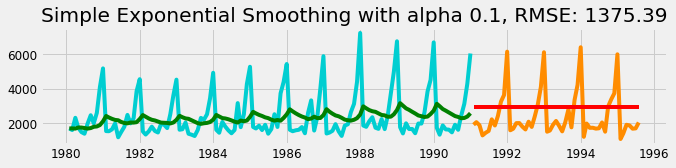

Test: For alpha = 0.20,  RMSE is 1595.2068 MAPE is 60.46
For smoothing level = 0.20,  Initial level 1686.00


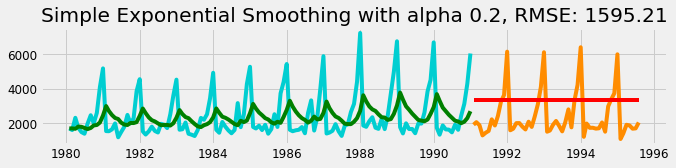

Test: For alpha = 0.30,  RMSE is 1935.5071 MAPE is 75.66
For smoothing level = 0.30,  Initial level 1686.00


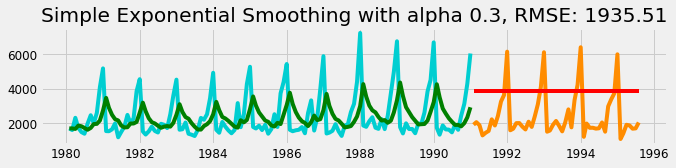

Test: For alpha = 0.50,  RMSE is 2666.3514 MAPE is 106.27
For smoothing level = 0.50,  Initial level 1686.00


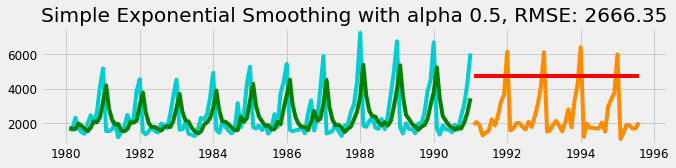

Test: For alpha = 0.99,  RMSE is 3847.5490 MAPE is 152.21
For smoothing level = 0.99,  Initial level 1686.00


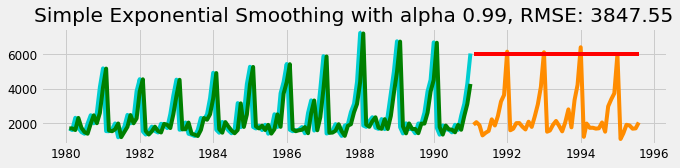

In [381]:
alpha_list = [0.05, 0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sparkling']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Sparkling'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Sparkling'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Sparkling'], color = 'darkturquoise')
    plt.plot(test['Sparkling'], color = 'darkorange')
    
   
    plt.plot(pred_train_SES[alpha_str], color = 'green')
    plt.plot(pred_test_SES[alpha_str], color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    
    plt.show();

In [382]:
model_SES_autofit = model.fit(optimized=True,use_brute=True)

In [383]:
model_SES_autofit.params

{'damping_slope': nan,
 'initial_level': 2403.7828696439005,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.0,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [384]:
SES_train['predict_spark'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling  predict_spark
Time_Stamp                          
1980-01-31       1686     2403.78287
1980-02-29       1591     2403.78287
1980-03-31       2304     2403.78287
1980-04-30       1712     2403.78287
1980-05-31       1471     2403.78287

In [385]:
SES_test['predict_spark'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  predict_spark
Time_Stamp                          
1991-01-31       1902     2403.78287
1991-02-28       2049     2403.78287
1991-03-31       1874     2403.78287
1991-04-30       1279     2403.78287
1991-05-31       1432     2403.78287

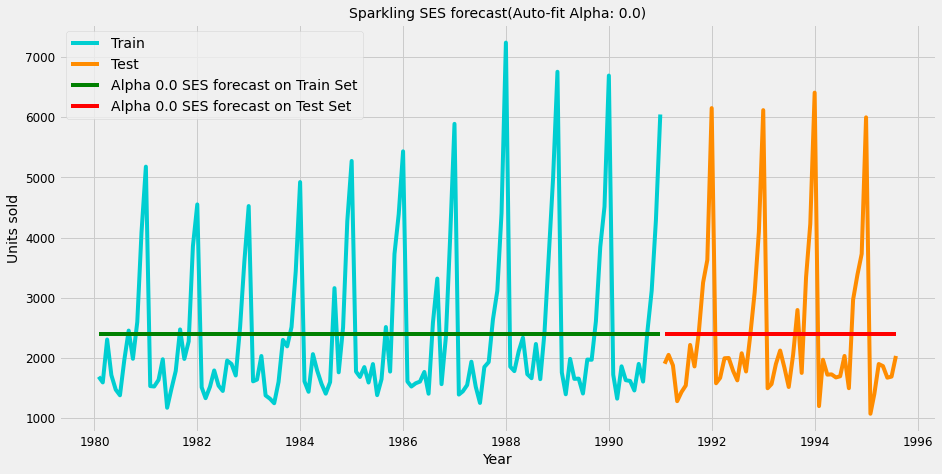

In [386]:
## Plotting on both the Training and Test data

#plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_train['predict_spark'],color = 'green', label='Alpha 0.0 SES forecast on Train Set')
plt.plot(SES_test['predict_spark'],color = 'red', label='Alpha 0.0 SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast(Auto-fit Alpha: 0.0)', fontsize = 14);

#print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))

**Model Evaluation**

In [387]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model5_train = metrics.mean_squared_error(train['Sparkling'],SES_train['predict_spark'],squared=False)
mape_spark_model5_train = MAPE(train['Sparkling'],SES_train['predict_spark'])
print("For SES forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_train, mape_spark_model5_train))

For SES forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [388]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SES_test['predict_spark'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SES_test['predict_spark'])
print("For SES forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SES forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [389]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['SES Alpha 0.00'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86
SES Alpha 0.00    1275.081813      38.90

**Model 6: Double Exponential Smoothing (Holt's Model)**

In [390]:
DES_train = train.copy()
DES_test = test.copy()

In [391]:
model_DES = Holt(DES_train['Sparkling'])

In [392]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_spark',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict_spark',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_spark_model6_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',i,j],squared=False),2)
        mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',i,j])
        
        rmse_spark_model6_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',i,j],squared=False),2)
        mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',i,j])
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,
                                          'Train RMSE':rmse_spark_model6_train ,'Train MAPE': mape_spark_model6_train,
                                          'Test RMSE':rmse_spark_model6_test ,'Test MAPE':mape_spark_model6_test}, 
                                         ignore_index=True)

In [393]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.43      67.23
1     0.1   0.2     1401.76       45.65    2599.79      95.44
10    0.2   0.1     1412.03       46.62    3611.77     135.41
2     0.1   0.3     1435.33       46.85    4290.13     155.32
20    0.3   0.1     1428.27       46.92    5908.19     223.50

In [394]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.43      67.23
1     0.1   0.2     1401.76       45.65    2599.79      95.44
10    0.2   0.1     1412.03       46.62    3611.77     135.41
2     0.1   0.3     1435.33       46.85    4290.13     155.32
3     0.1   0.4     1471.35       48.26    6041.56     219.06

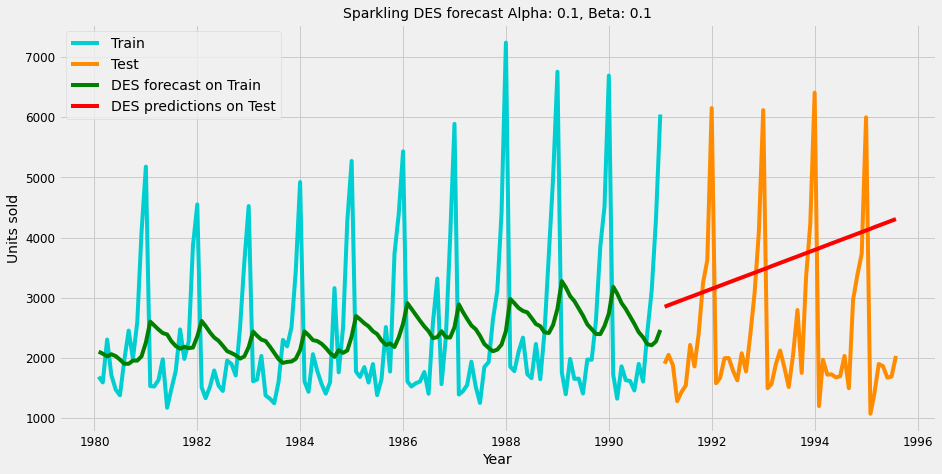

In [395]:
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_spark', 0.1, 0.1], color = 'red', label='DES predictions on Test')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best');

Letting the model auto fit

In [396]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [397]:
model_DES_autofit.params

{'damping_slope': nan,
 'initial_level': 1686.0825794906987,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 27.05013613663255,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.6478144580517214,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0,
 'use_boxcox': False}

In [398]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_slope']
alpha_6_1 = alpha
beta_6_1 = beta

In [399]:
DES_train['predict_spark',alpha,beta] = model_DES_autofit.fittedvalues

In [400]:
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test['Sparkling']))

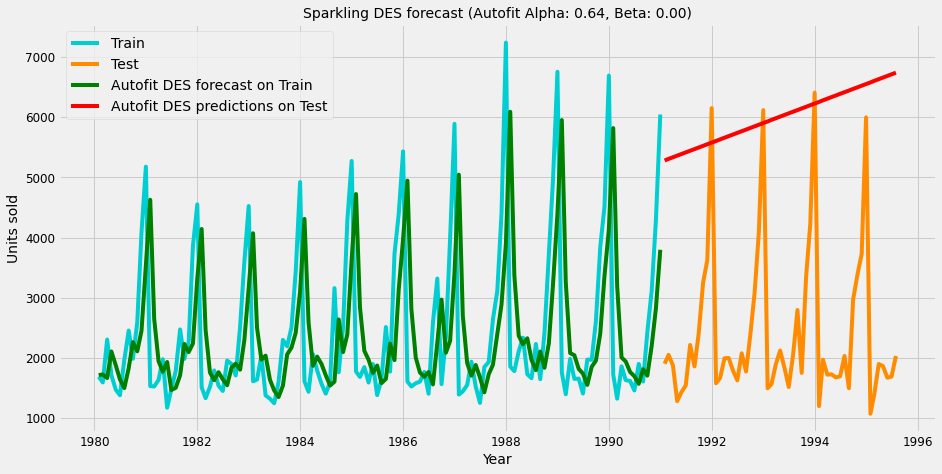

In [401]:
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.64, Beta: 0.00)', fontsize=14);
plt.legend(loc='best');

In [402]:
rmse_spark_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta],squared=False)
mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta])
        
rmse_spark_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta])

resultsDf_6 = resultsDf_6.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_spark_model6_train
                                      ,'Train MAPE': mape_spark_model6_train,'Test RMSE':rmse_spark_model6_test
                                      ,'Test MAPE':mape_spark_model6_test}, ignore_index=True)

In [403]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000   0.1  1363.47000       44.26  1779.430000      67.23
1    0.100000   0.2  1401.76000       45.65  2599.790000      95.44
10   0.200000   0.1  1412.03000       46.62  3611.770000     135.41
100  0.647814   0.0  1337.48427       39.11  3850.779835     152.05
2    0.100000   0.3  1435.33000       46.85  4290.130000     155.32

In [404]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000   0.1  1363.47000       44.26  1779.430000      67.23
1    0.100000   0.2  1401.76000       45.65  2599.790000      95.44
10   0.200000   0.1  1412.03000       46.62  3611.770000     135.41
100  0.647814   0.0  1337.48427       39.11  3850.779835     152.05
2    0.100000   0.3  1435.33000       46.85  4290.130000     155.32

Auto-fitted model shows better RMSE and MAPE in train, but not the best fit in test set

**Model Evaluation**

In [405]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][100]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][100]]}
                           ,index=['DES Alpha 0.1,Beta 0.1','DES Alpha 0.6,Beta 0.0'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime        1389.135175      50.15
NaiveModel              3864.279352     152.87
SimpleAverage           1275.081804      38.90
2 point TMA              813.400684      19.70
4 point TMA             1156.589694      35.96
6 point TMA             1283.927428      43.86
9 point TMA             1346.278315      46.86
SES Alpha 0.00          1275.081813      38.90
DES Alpha 0.1,Beta 0.1  1779.430000      67.23
DES Alpha 0.6,Beta 0.0  3850.779835     152.05

**Model 7: Triple Exponential Smoothing (Holt - Winter's Model)**

In [406]:
TES_train = train.copy()
TES_test = test.copy()

In [407]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [408]:
resultsDf_7_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_spark',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_spark',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Sparkling']))
        
            rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',i,j,k],squared=False)
            mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',i,j,k])
        
            rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',i,j,k],squared=False)
            mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',i,j,k])
        
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [409]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
301    0.4   0.1    0.2  373.281410       11.05  312.211065      10.20
211    0.3   0.2    0.2  377.346884       11.23  315.195008      10.07
300    0.4   0.1    0.1  370.807398       11.06  318.281165      10.00
402    0.5   0.1    0.3  390.181794       11.54  325.690520       9.99
403    0.5   0.1    0.4  401.059753       11.55  343.321915      11.07

In [410]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
402    0.5   0.1    0.3  390.181794       11.54  325.690520       9.99
300    0.4   0.1    0.1  370.807398       11.06  318.281165      10.00
211    0.3   0.2    0.2  377.346884       11.23  315.195008      10.07
301    0.4   0.1    0.2  373.281410       11.05  312.211065      10.20
401    0.5   0.1    0.2  384.608362       11.44  344.182644      10.67

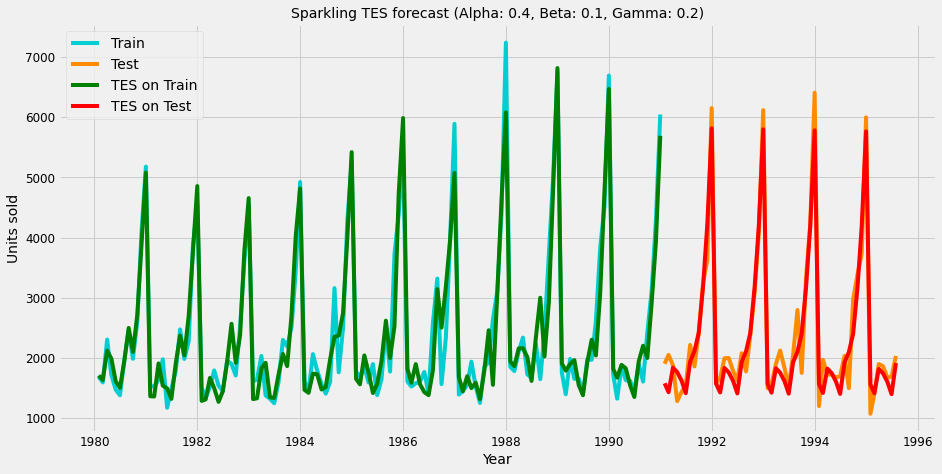

In [411]:
#plt.figure(figsize=(15,5))
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark', 0.4, 0.1, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark', 0.4, 0.1, 0.2], color='red', label='TES on Test')

#plt.plot(TES_train['predict_spark', 0.5, 0.1, 0.3], color = 'green', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Train')
#plt.plot(TES_test['predict_spark', 0.5, 0.1, 0.3], color='red', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Test')

plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best');

Attempting to autofit the TES model

In [412]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [413]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 1639.9993399027126,
 'initial_seasons': array([1.00841739, 0.96899632, 1.24171643, 1.13206069, 0.93984119,
        0.93813873, 1.22454059, 1.54419134, 1.27332629, 1.63190096,
        2.4826116 , 3.11820572]),
 'initial_slope': 4.884660841988308,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.15443784802011637,
 'smoothing_seasonal': 0.37116865308973673,
 'smoothing_slope': 7.4133171248060435e-28,
 'use_boxcox': False}

In [414]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_slope']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_1 = alpha
beta_7_1 = beta
gamma_7_1 = gamma

In [415]:
TES_train['predict_spark',alpha,beta,gamma] = model_TES_autofit.fittedvalues

In [416]:
TES_test['predict_spark',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Sparkling']))

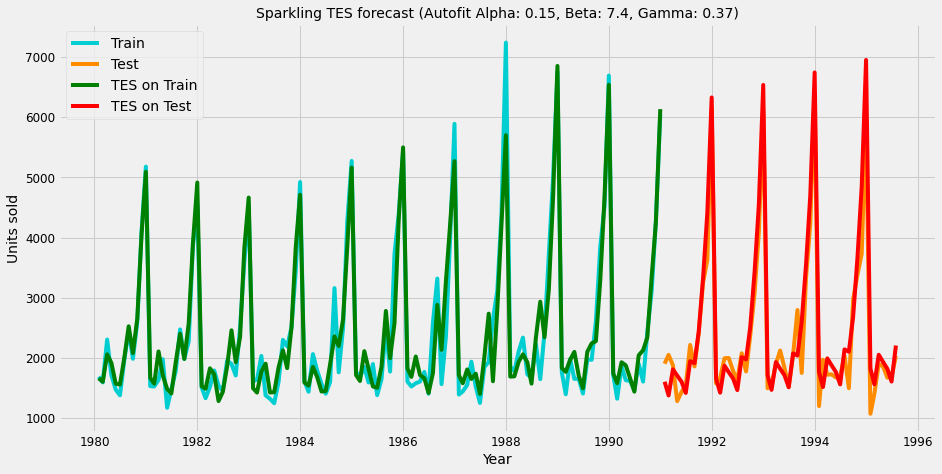

In [417]:
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.15, Beta: 7.4, Gamma: 0.37)', fontsize=14)

plt.legend(loc='best');

In [418]:
rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma])
        
rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma])
        
resultsDf_7_1 = resultsDf_7_1.append({'Alpha':np.round(alpha,2),'Beta':np.round(beta,2),'Gamma':np.round(gamma,2),'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [419]:
resultsDf_7_1.tail()

Alpha  Beta  Gamma     Train RMSE  Train MAPE     Test RMSE  Test MAPE
996    1.00   1.0   0.70   93702.603162     1031.58  1.383388e+06   25559.44
997    1.00   1.0   0.80  104677.046328     1039.17  3.959727e+06   55484.79
998    1.00   1.0   0.90  161779.762665     1427.45  5.643065e+05    8672.79
999    1.00   1.0   1.00  239920.545915     1304.98  1.211460e+05    3173.80
1000   0.15   0.0   0.37     353.379117       10.18  3.841977e+02      11.94

In [420]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
301    0.4   0.1    0.2  373.281410       11.05  312.211065      10.20
211    0.3   0.2    0.2  377.346884       11.23  315.195008      10.07
300    0.4   0.1    0.1  370.807398       11.06  318.281165      10.00
402    0.5   0.1    0.3  390.181794       11.54  325.690520       9.99
403    0.5   0.1    0.4  401.059753       11.55  343.321915      11.07

In [421]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
402    0.5   0.1    0.3  390.181794       11.54  325.690520       9.99
300    0.4   0.1    0.1  370.807398       11.06  318.281165      10.00
211    0.3   0.2    0.2  377.346884       11.23  315.195008      10.07
301    0.4   0.1    0.2  373.281410       11.05  312.211065      10.20
401    0.5   0.1    0.2  384.608362       11.44  344.182644      10.67

**Model evaluation**

In [422]:
resultsDf_7_sp = pd.DataFrame({'Test RMSE': [resultsDf_7_1['Test RMSE'][301],resultsDf_7_1['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_1['Test MAPE'][301],resultsDf_7_1['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.4, Beta 0.1, Gamma 0.2','TES Alpha 0.15, Beta 0.00, Gamma 0.37'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_sp])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1275.081813      38.90
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3850.779835     152.05
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211065      10.20
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.197750      11.94

In [423]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211065      10.20
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.197750      11.94
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
SES Alpha 0.00                         1275.081813      38.90
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3850.779835     152.05
NaiveModel                             3864.279352     152.87

**Plot all above models**

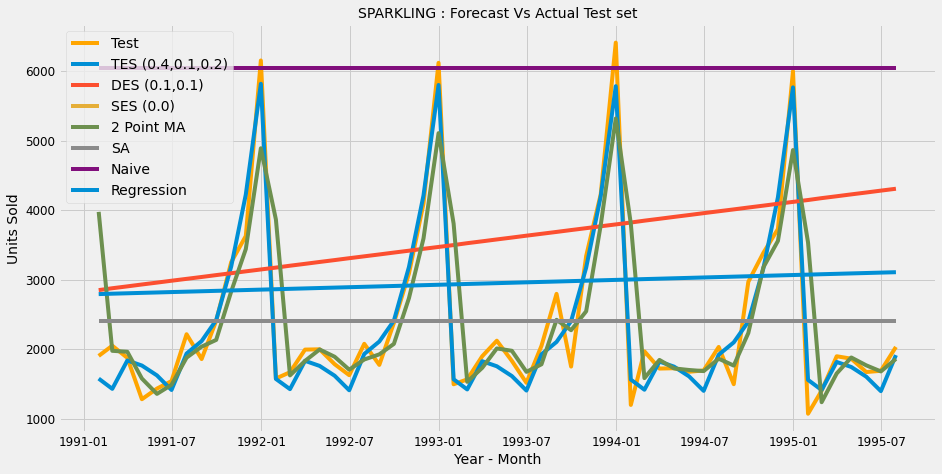

In [424]:
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')

#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES (0.4,0.1,0.2)')
#DES
plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES (0.1,0.1)')
#SES
plt.plot(SES_test['predict_spark'],  label='SES (0.0)')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year - Month')
plt.ylabel('Units Sold')
plt.title('SPARKLING : Forecast Vs Actual Test set', fontsize=14);

**ARIMA Models**

Check for stationarity of the whole Time Series data.

In [425]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

Original series

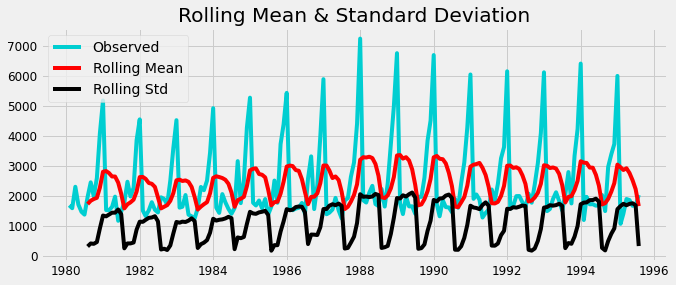

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [426]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'],'darkturquoise')

Differenced series

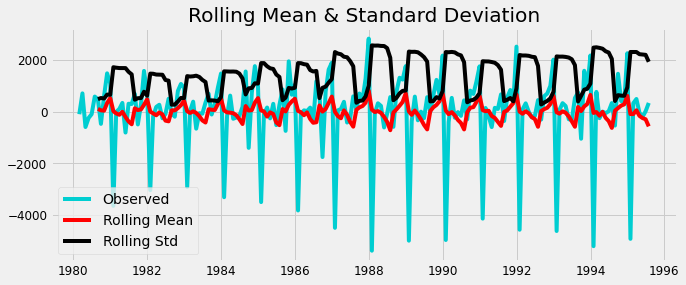

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [427]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'].diff().dropna(),'darkturquoise')

We see that at 5% significant level the time series is non-stationary. But the seasonality is multiplicative as the standard deviation and mean vary according to the change in trend. Let us take a difference of order 1 and check whether the time series is stationary or not.

Difference of original series

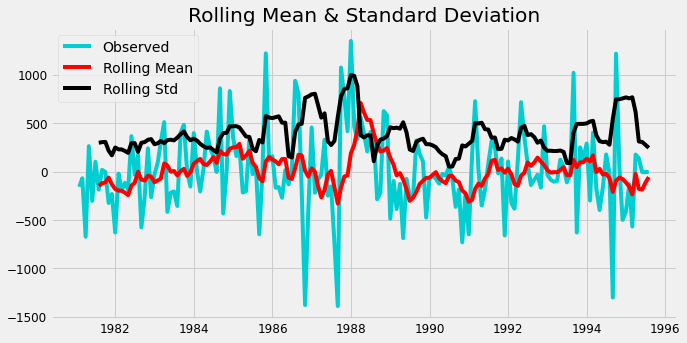

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [428]:
plt.figure(figsize=(10,5))
test_stationarity(df['Sparkling'].diff(12).dropna(), 'darkturquoise')

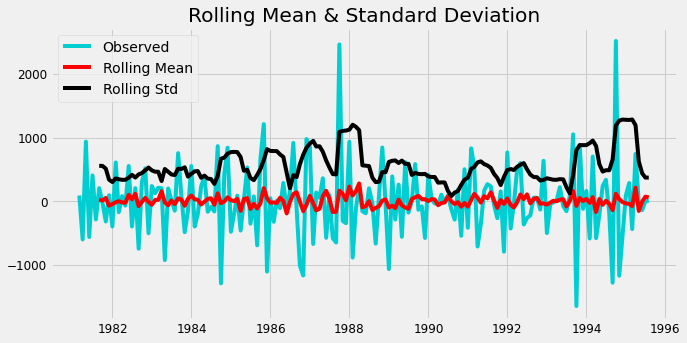

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [429]:
plt.figure(figsize=(10,5))
test_stationarity((df['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary. But seasonality is multiplicative

**Log of series**

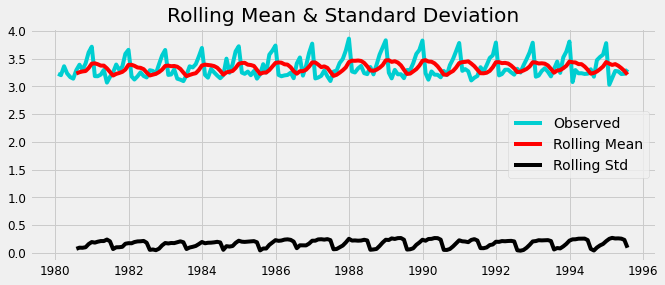

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [430]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']), 'darkturquoise')

Seasonality is now additive but non stationary

**Difference of log of series**

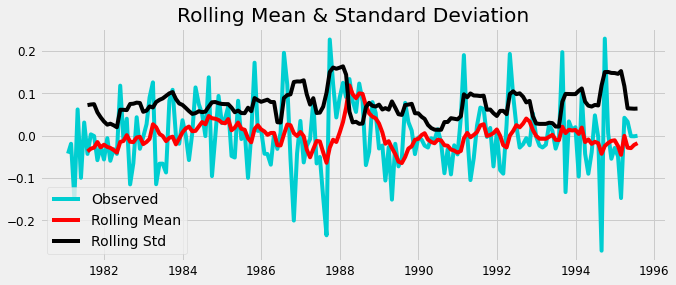

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [431]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']).diff(12).dropna(),  'darkturquoise')

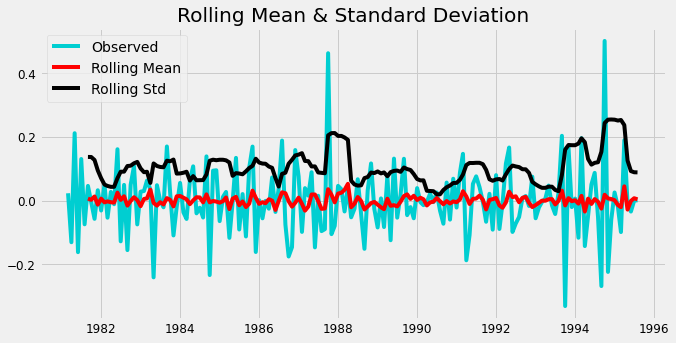

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [432]:
plt.figure(figsize=(10,5))
test_stationarity((np.log10(df['Sparkling']).diff(12).dropna()).diff().dropna(),  'darkturquoise')

**Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.**

In [433]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ACF Plots

<Figure size 720x360 with 0 Axes>

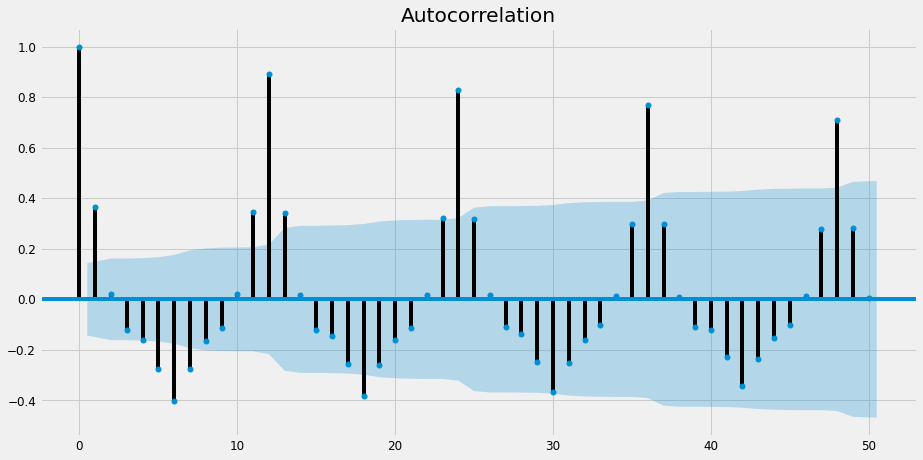

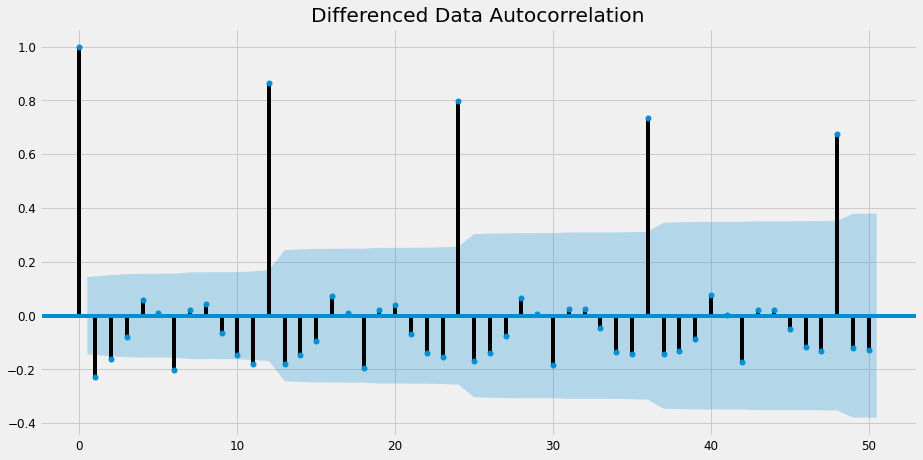

In [434]:
plt.figure(figsize=(10,5))
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

PACF Plots

<Figure size 720x360 with 0 Axes>

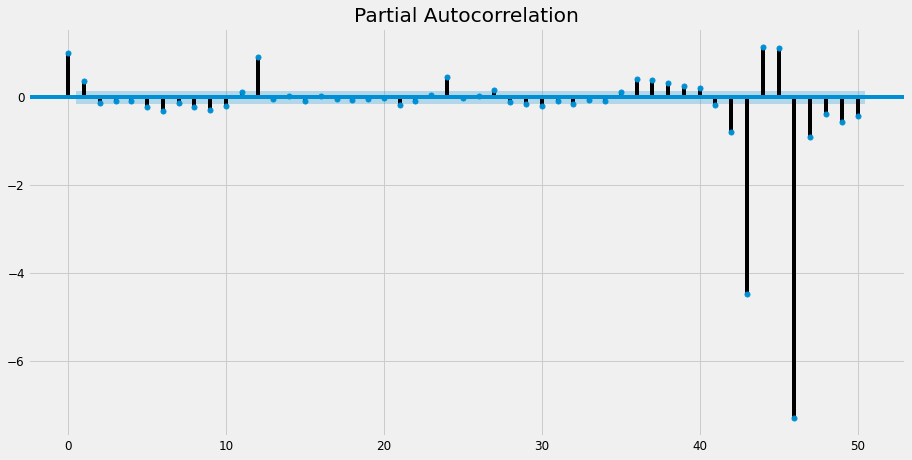

In [435]:
plt.figure(figsize=(10,5))
plot_pacf(df['Sparkling'],lags=50)
print('', '\n')

<Figure size 720x360 with 0 Axes>

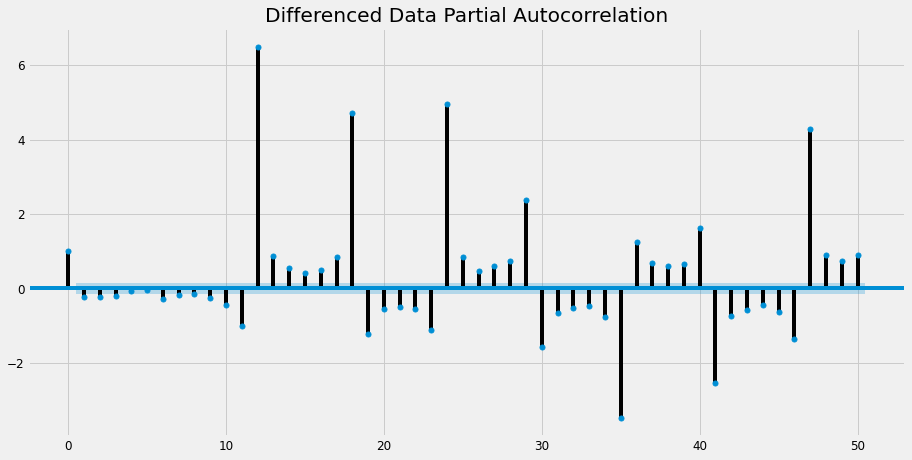

In [436]:
plt.figure(figsize=(10,5))
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
print('', '\n')

<Figure size 720x360 with 0 Axes>

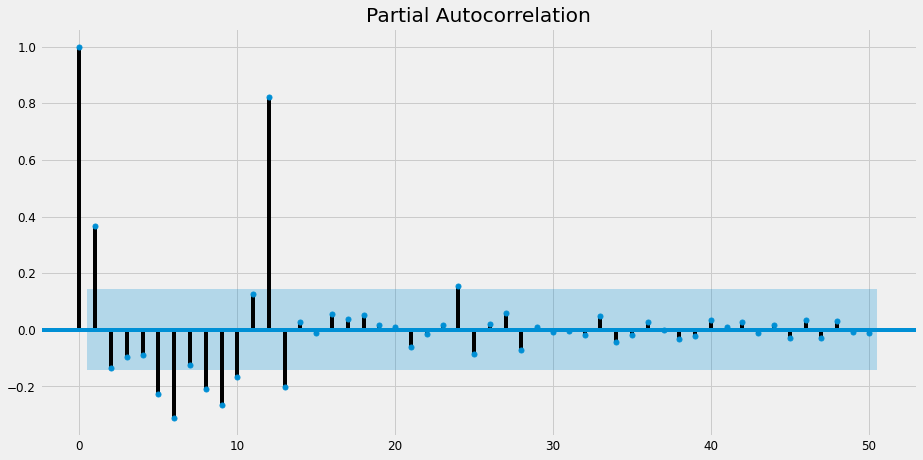

In [437]:
plt.figure(figsize=(10,5))
plot_pacf(df['Sparkling'],lags=50, method='ywmle')
print('', '\n')

<Figure size 720x360 with 0 Axes>

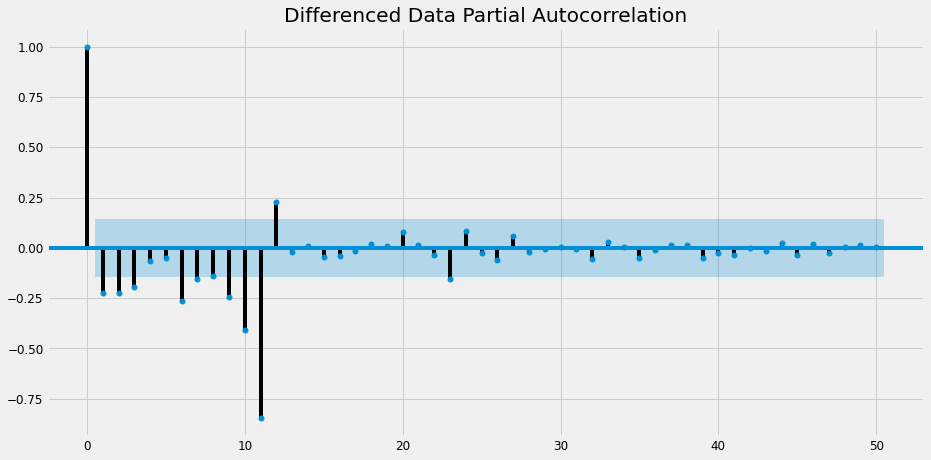

In [438]:
plt.figure(figsize=(10,5))
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation', method='ywmle')
plt.show();

From the above plots, we can say that there seems to be a seasonality in the data.

**Model 8: SARIMA**

In [439]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

**AUTO SARIMA on original data**

In [440]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)

pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [441]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [442]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678538
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.677357425467
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3045.9243200381943
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.32439081851
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.528962130823
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:nan
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981866626
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.99115536443
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:nan
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1291.2448875094228
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1288.6070380218262
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3724.9781857266444
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719828372
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.6639234230006
SARIMA(0, 1, 1)x(0, 1, 2, 12)7

In [443]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param       seasonal          AIC
252  (3, 1, 3)  (3, 1, 0, 12)  1213.282563
253  (3, 1, 3)  (3, 1, 1, 12)  1215.213343
220  (3, 1, 1)  (3, 1, 0, 12)  1215.898777
254  (3, 1, 3)  (3, 1, 2, 12)  1216.480085
236  (3, 1, 2)  (3, 1, 0, 12)  1216.859180

In [444]:
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, 0, 12)   Log Likelihood                -596.641
Date:                            Fri, 08 Oct 2021   AIC                           1213.283
Time:                                    08:02:03   BIC                           1237.103
Sample:                                         0   HQIC                          1222.833
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6138      0.176     -9.174      0.000      -1.959      -1.269
ar.L2         -0.6117      0.299   

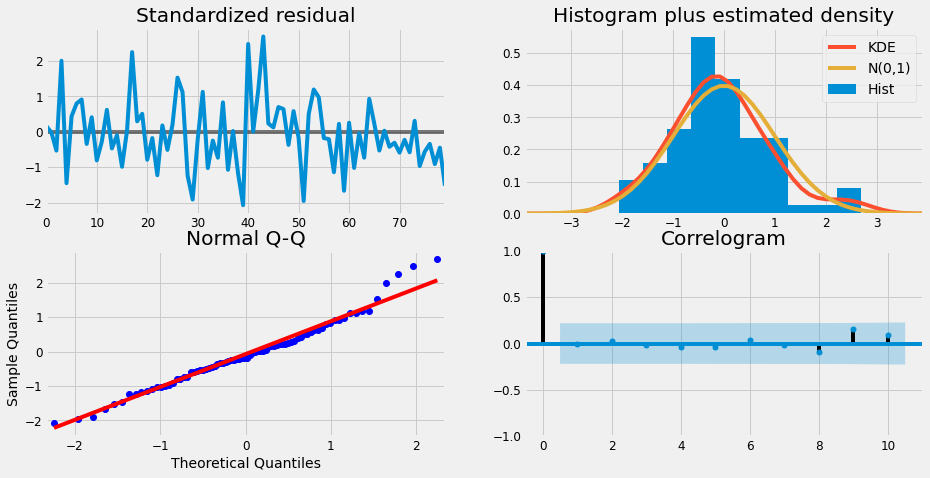

In [445]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

In [446]:
SARIMA_test.head()

Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [447]:
pred_dynamic = results_auto_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [448]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.05)

In [449]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1430.435992  431.198057     585.303331    2275.568654
1  1540.310097  458.412112     641.838869    2438.781326
2  1707.333372  460.179283     805.398551    2609.268193
3  1858.864004  466.747778     944.055170    2773.672839
4  1501.503828  467.048273     586.106034    2416.901622

In [450]:
# Extract the predicted and true values of our time series
spark_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted
Time_Stamp                             
1991-01-31       1902       1430.435992
1991-02-28       2049       1540.310097
1991-03-31       1874       1707.333372
1991-04-30       1279       1858.864004
1991-05-31       1432       1501.503828

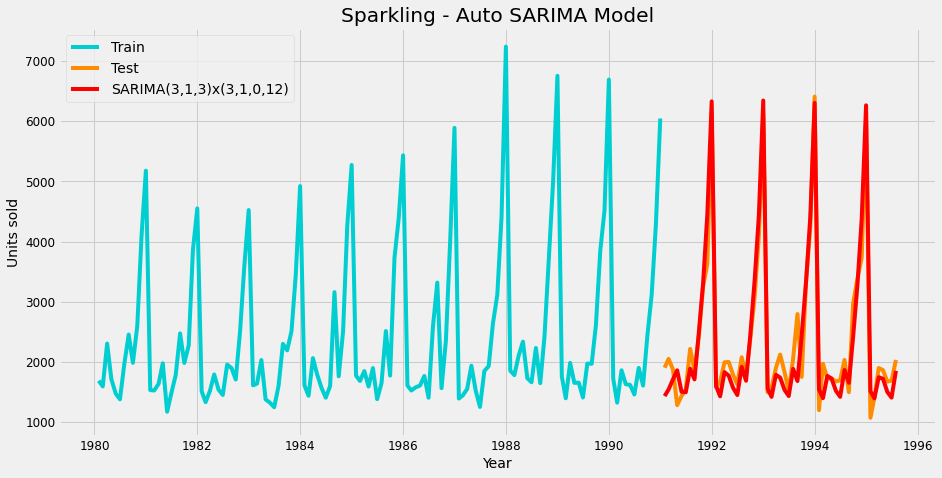

In [451]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(3,1,3)x(3,1,0,12)')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best');

In [452]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 331.696 and MAPE is 10.34


In [453]:
resultsDf_8_spark1 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark1])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1275.081813      38.90
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3850.779835     152.05
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211065      10.20
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.197750      11.94
Auto SARIMA(3,1,3)x(3,1,0,12)           331.695786      10.34

**AUTO SARIMA on Log**

In [454]:
spark_log_train = np.log10(SARIMA_train['Sparkling'])

<function matplotlib.pyplot.show>

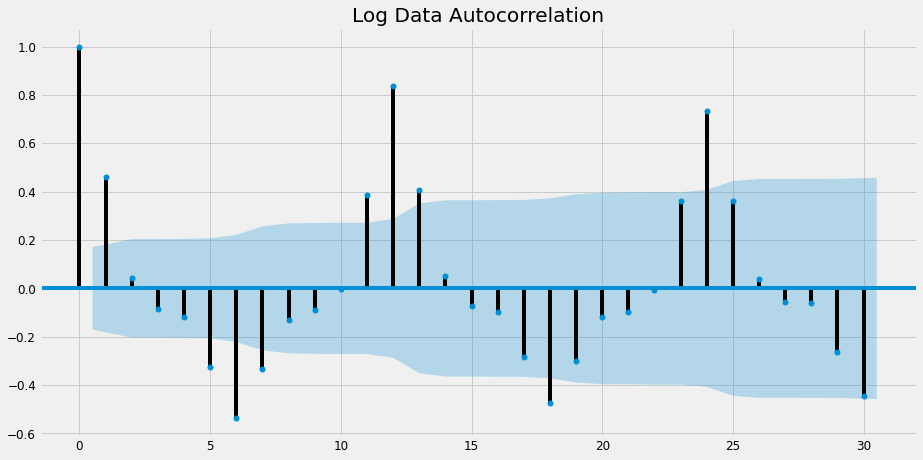

In [455]:
plot_acf(spark_log_train,lags=30,title='Log Data Autocorrelation')
plt.show

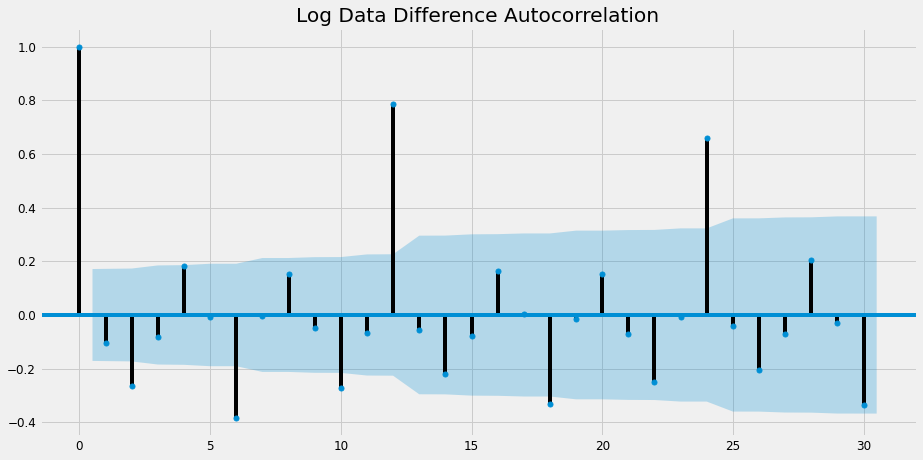

In [456]:
plot_acf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

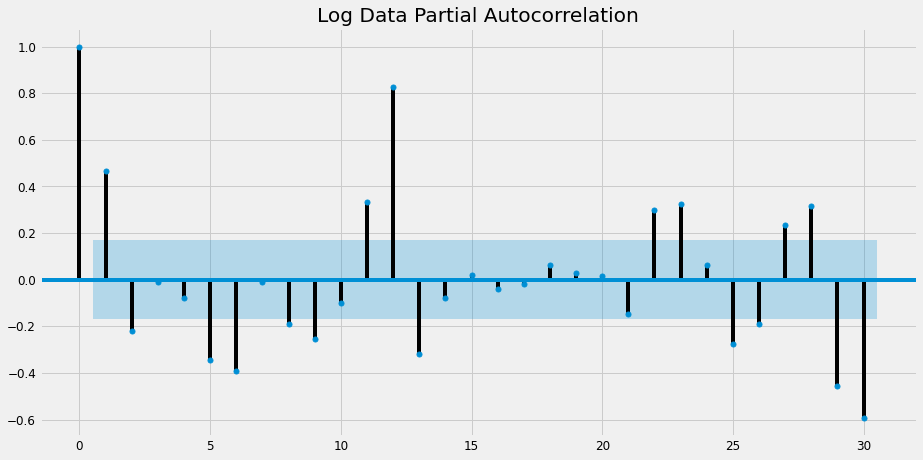

In [457]:
plot_pacf(spark_log_train,lags=30,title='Log Data Partial Autocorrelation')
plt.show()

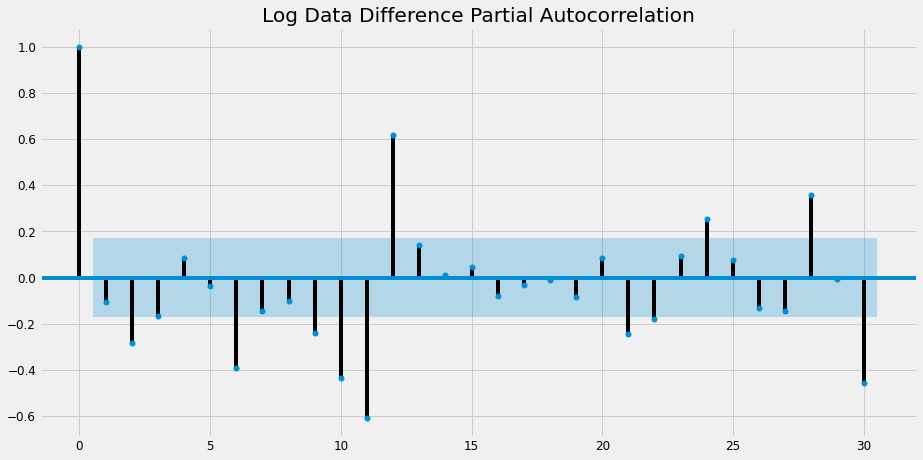

In [458]:
plot_pacf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.

In [459]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [460]:
SARIMA_AIC_spark_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [461]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,#train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark_log = SARIMA_model_spark_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark_log.aic))
        SARIMA_AIC_spark_log = SARIMA_AIC_spark_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark_log.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.223163262272436
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.81829469978433
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.07304219597543
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.9106449323919
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.2104085493136
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.11378275970435
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527740108477
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.19047182016152
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.4132850488919
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.40913579723048
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.675760972331
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.28892576294257
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.15491722268666
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.30580338803773
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.59900293226042
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.2279754117122
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.23566714830048
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:

In [462]:
SARIMA_AIC_spark_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517333
43   (0, 1, 2)  (1, 0, 1, 12) -281.567994
97   (1, 1, 2)  (1, 0, 1, 12) -279.611721
133  (2, 1, 1)  (1, 0, 1, 12) -278.288233

In [463]:
import statsmodels.api as sm

auto_SARIMA_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark_log = auto_SARIMA_spark_log.fit(maxiter=1000)
print(results_auto_SARIMA_spark_log.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Fri, 08 Oct 2021   AIC                           -284.472
Time:                                    08:04:52   BIC                           -273.423
Sample:                                01-31-1980   HQIC                          -279.986
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.862      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

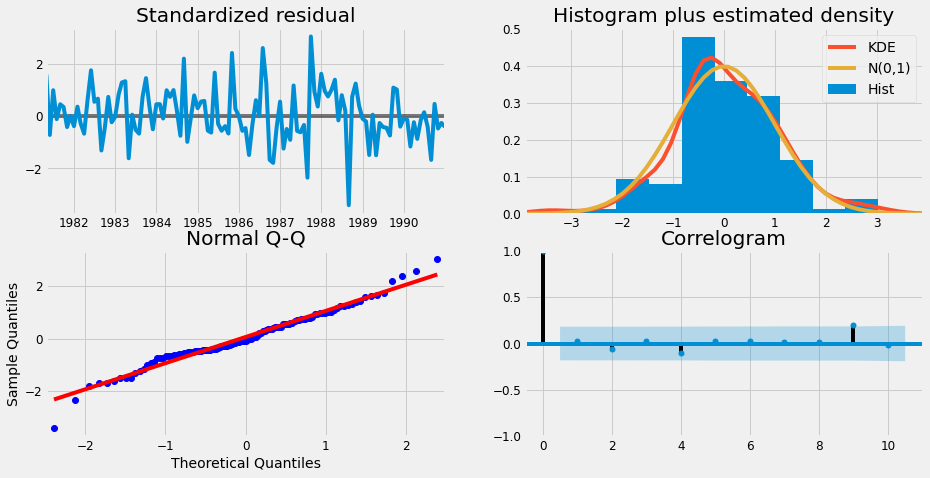

In [464]:
results_auto_SARIMA_spark_log.plot_diagnostics()
plt.show()

**Predict on the Test Set using this model**

In [465]:
SARIMA_test.head()

Sparkling  spark_forecasted
Time_Stamp                             
1991-01-31       1902       1430.435992
1991-02-28       2049       1540.310097
1991-03-31       1874       1707.333372
1991-04-30       1279       1858.864004
1991-05-31       1432       1501.503828

In [466]:
pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(dynamic=True, full_results=True)

In [467]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark_log = results_auto_SARIMA_spark_log.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.1)

In [468]:
predicted_auto_SARIMA_spark_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  3.212031  0.067108       3.080502       3.343560
1991-02-28  3.141307  0.067465       3.009078       3.273535
1991-03-31  3.256285  0.067821       3.123359       3.389211
1991-04-30  3.226732  0.068175       3.093112       3.360351
1991-05-31  3.195787  0.068527       3.061478       3.330097

In [469]:
# Extract the predicted and true values of our time series
spark_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['spark_log_forecasted'] = np.power(10, predicted_auto_SARIMA_spark_log.predicted_mean)
SARIMA_test.head()

Sparkling  spark_forecasted  spark_log_forecasted
Time_Stamp                                                   
1991-01-31       1902       1430.435992           1629.412404
1991-02-28       2049       1540.310097           1384.544633
1991-03-31       1874       1707.333372           1804.202350
1991-04-30       1279       1858.864004           1685.511077
1991-05-31       1432       1501.503828           1569.594099

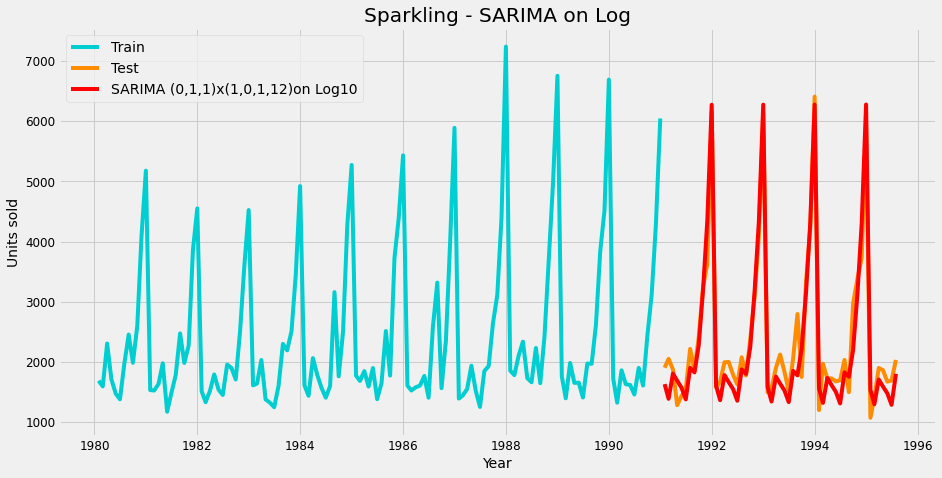

In [470]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_log_forecasted'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best');

In [471]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_log_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_log_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 336.801 and MAPE is 11.19


In [472]:
resultsDf_8_spark2 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(0,1,1)x(1,0,1,12)-Log10'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1275.081813      38.90
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3850.779835     152.05
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211065      10.20
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.197750      11.94
Auto SARIMA(3,1,3)x(3,1,0,12)           331.695786      10.34
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.801449      11.19

**Manual SARIMA**

Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

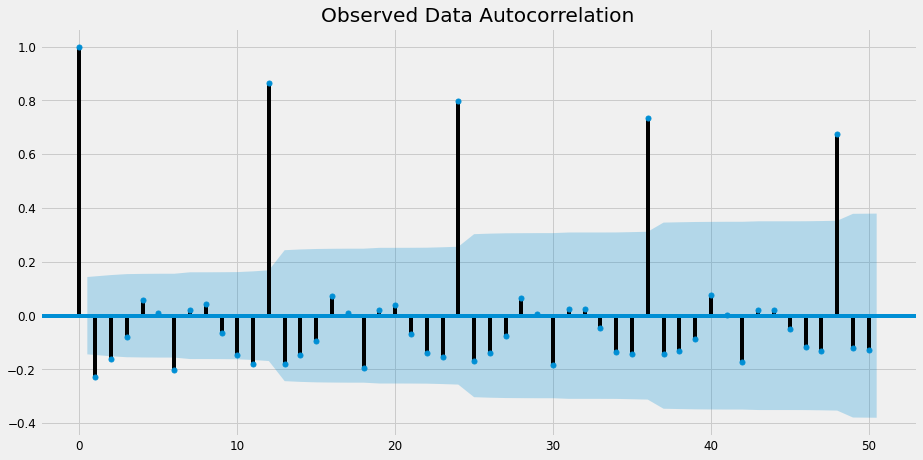

In [473]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plt.show()

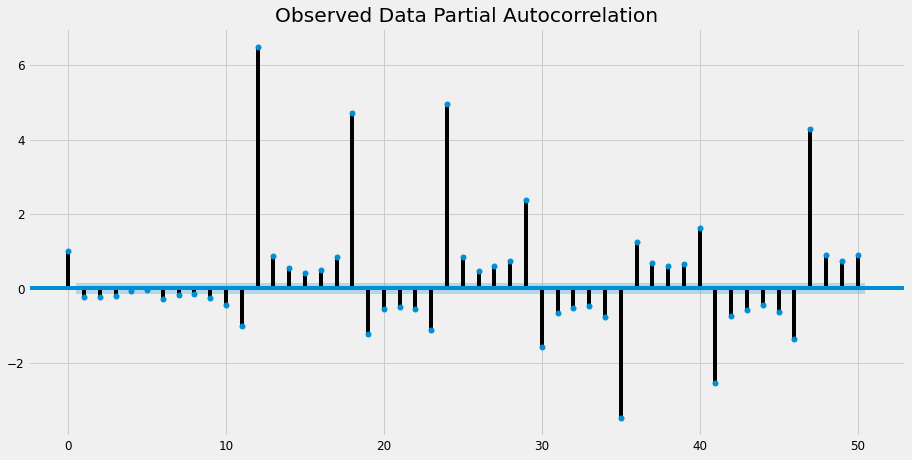

In [474]:
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Partial Autocorrelation')
plt.show()

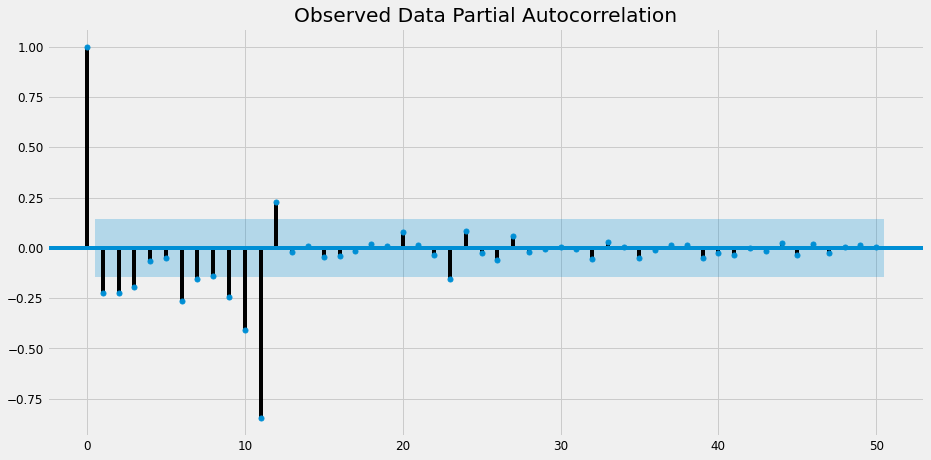

In [475]:
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Partial Autocorrelation', method='ywmle')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. But before that, let us look at the original series.

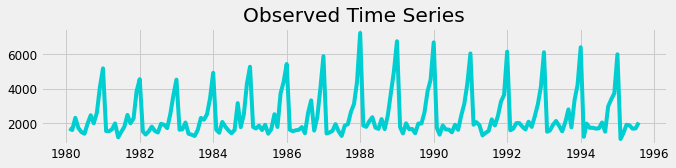

In [476]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'], color = 'darkturquoise')
plt.title ('Observed Time Series');

We see that there is marginal trend and but have significant seasonality. So, now we take a seasonal differencing and check the series.

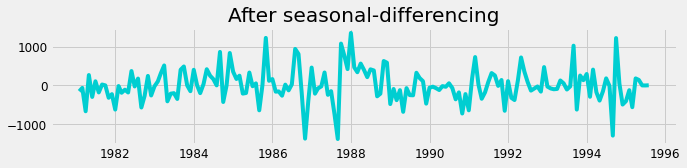

In [477]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'].diff(12).dropna(), color = 'darkturquoise')
plt.title ('After seasonal-differencing');

The marginal trend in the data is still seen

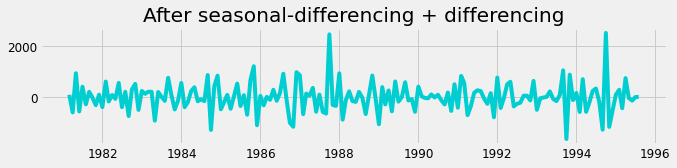

In [478]:
plt.figure(figsize=(10,2))
plt.plot((df['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.
Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

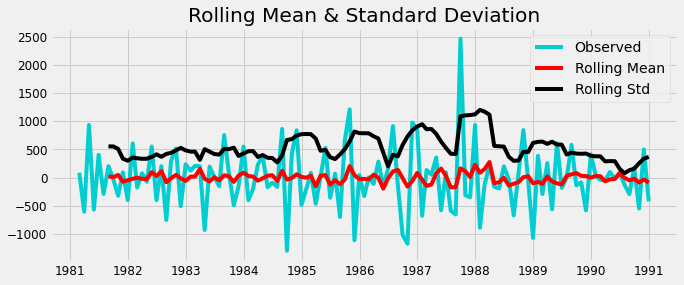

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [479]:
plt.figure(figsize=(10,4))
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

Checking the ACF and the PACF plots for the new modified Time Series.

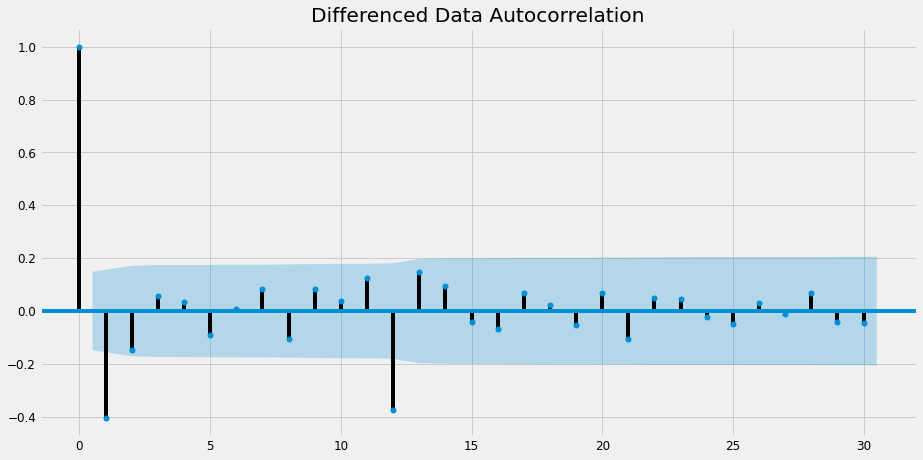

In [480]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plt.show()

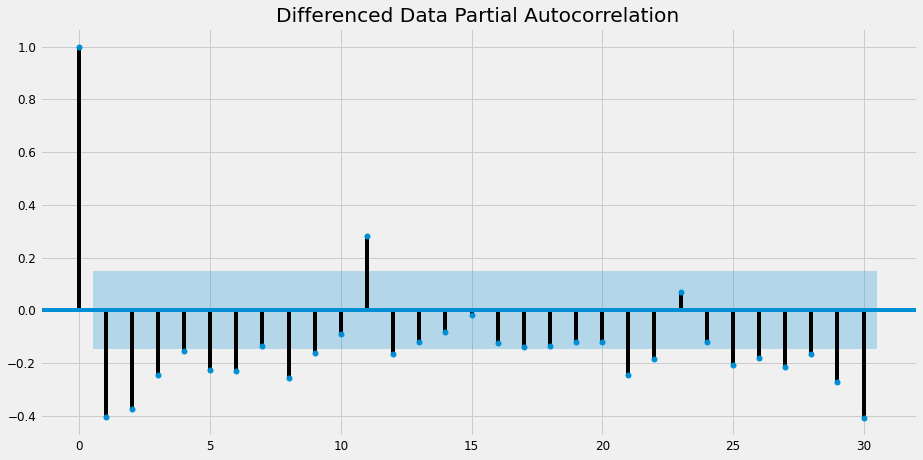

In [481]:
plot_pacf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [482]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, 2, 12)   Log Likelihood                -693.697
Date:                            Fri, 08 Oct 2021   AIC                           1403.394
Time:                                    08:04:59   BIC                           1423.654
Sample:                                         0   HQIC                          1411.574
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0.478
ar.L2         -0.0798      0.131   

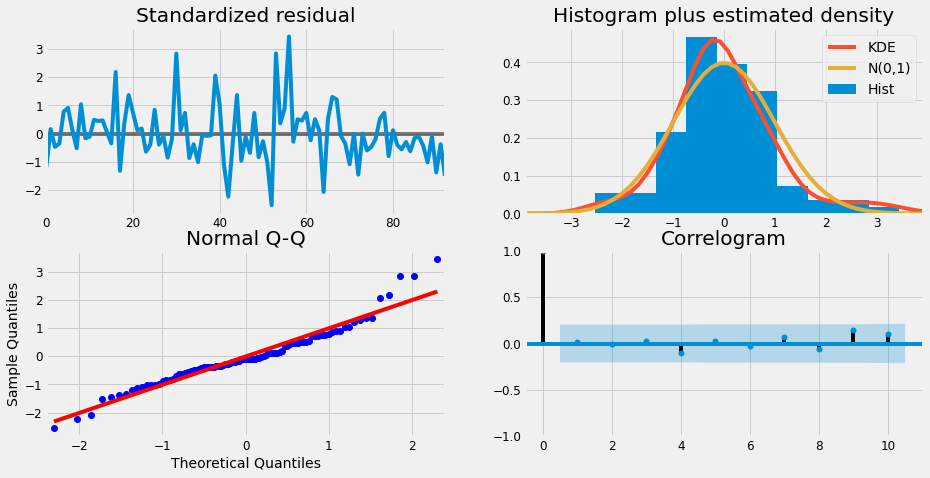

In [483]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

In [484]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [485]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [486]:
predicted_manual_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.910092  416.594409     763.400053    2396.420130
1  1419.154450  429.113793     578.106870    2260.202030
2  1868.144134  429.104434    1027.114896    2709.173371
3  1731.472282  430.973097     886.780534    2576.164031
4  1659.822690  431.906077     813.302335    2506.343045

In [487]:
# Extract the predicted and true values of our time series
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  ...  spark_manual_forecasted
Time_Stamp             ...                         
1991-01-31       1902  ...              1579.910092
1991-02-28       2049  ...              1419.154450
1991-03-31       1874  ...              1868.144134
1991-04-30       1279  ...              1731.472282
1991-05-31       1432  ...              1659.822690

[5 rows x 4 columns]

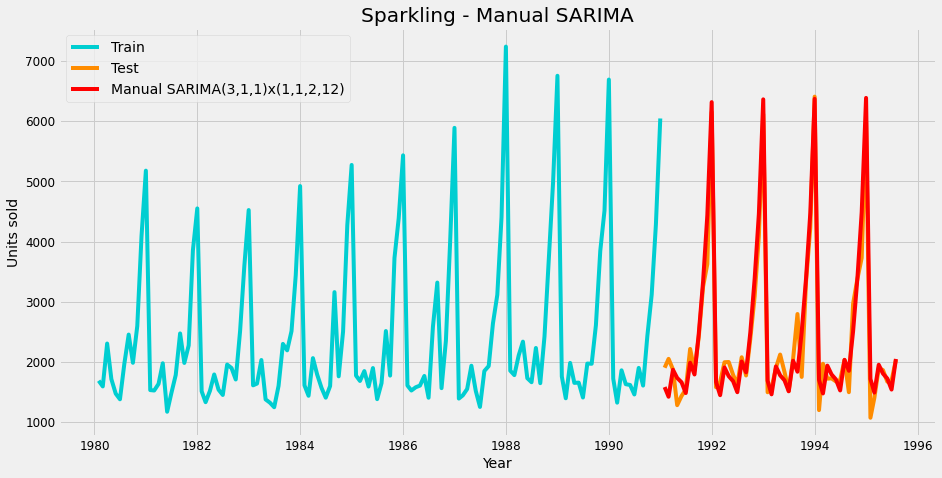

In [488]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best');

In [489]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_manual_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.107 and MAPE is 9.48


In [490]:
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark3])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1275.081813      38.90
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3850.779835     152.05
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211065      10.20
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.197750      11.94
Auto SARIMA(3,1,3)x(3,1,0,12)           331.695786      10.34
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.801449      11.19
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106792       9.48

**Building the most optimum model on the Full Data.¶**

Sort the results from all the models

In [491]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211065      10.20
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106792       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)           331.695786      10.34
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.801449      11.19
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.197750      11.94
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
SES Alpha 0.00                         1275.081813      38.90
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3850.779835     152.05
NaiveModel                             3864.279352     152.87

In [492]:
spark_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106792       9.48
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211065      10.20
Auto SARIMA(3,1,3)x(3,1,0,12)           331.695786      10.34
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.801449      11.19
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.197750      11.94
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
SES Alpha 0.00                         1275.081813      38.90
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3850.779835     152.05
NaiveModel                             3864.279352     152.87

**Plot all the forecast**

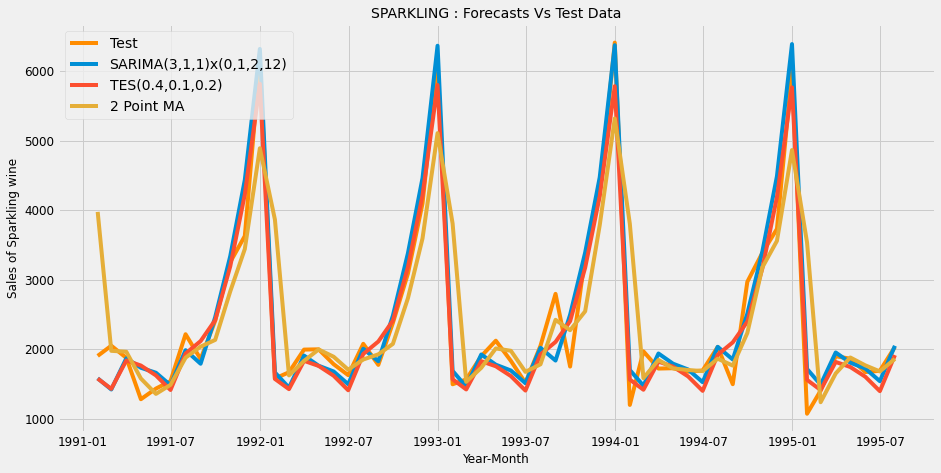

In [493]:
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

#SARIMA
plt.plot(SARIMA_test['spark_manual_forecasted'],  label='SARIMA(3,1,1)x(0,1,2,12)')
#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES(0.4,0.1,0.2)')
#DES
#plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES')
#SES
#plt.plot(SES_test['predict_spark'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
#plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
#plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
#plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling wine',fontsize=12)
plt.title('SPARKLING : Forecasts Vs Test Data', fontsize=14);

**Build model on all of the dataset using best model, which is TES**

In [494]:
model_TES_spark = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_spark_forecast = model_TES_spark_fit.forecast(steps=12)

In [495]:
rmse_spark_tes_full = metrics.mean_squared_error(df['Sparkling'],model_TES_spark_fit.fittedvalues,squared=False)
mape_spark_tes_full = MAPE(df['Sparkling'],model_TES_spark_fit.fittedvalues)
print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_tes_full, mape_spark_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 376.821 and MAPE is 11.30


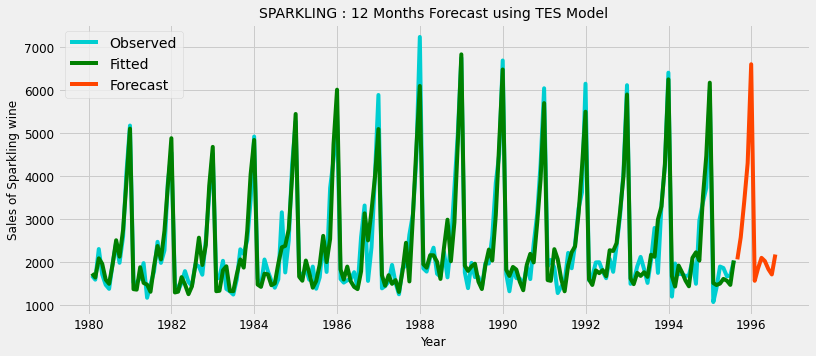

In [496]:
plt.figure(figsize=(12,5))

plt.plot(df['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_spark_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales of Sparkling wine',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14);

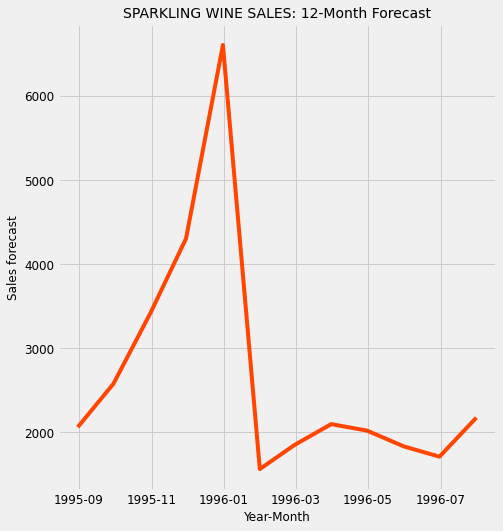

In [497]:
plt.figure(figsize=(7,8))
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING WINE SALES: 12-Month Forecast', fontsize=14);

**Trying out SARIMA(3,1,1)x(1,1,2,12) for the forecast**

In [498]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, 2, 12)   Log Likelihood               -1078.437
Date:                            Fri, 08 Oct 2021   AIC                           2176.875
Time:                                    08:05:18   BIC                           2206.711
Sample:                                01-31-1980   HQIC                          2188.998
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4229      0.086     -4.916      0.000      -0.591      -0.254
ar.L2         -0.9094      0.053   

In [499]:
rcParams['figure.figsize'] = 14,7

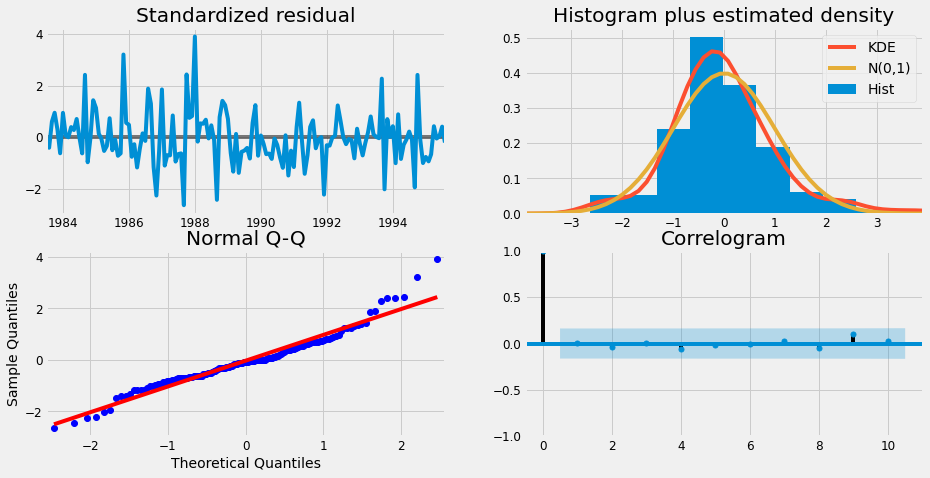

In [500]:
results_full_data_model_spark.plot_diagnostics();

In [501]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [502]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1873.317897  384.477893    1119.755074    2626.880720
1995-09-30  2445.126073  389.491583    1681.736599    3208.515547
1995-10-31  3312.737952  390.186433    2547.986596    4077.489308
1995-11-30  3994.660130  390.695547    3228.910930    4760.409331
1995-12-31  6084.204109  390.825246    5318.200703    6850.207515

In [503]:
rmse_spark_sarima_full = metrics.mean_squared_error(df['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
mape_spark_sarima_full = MAPE(df['Sparkling'],results_full_data_model_spark.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_sarima_full, mape_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 591.245 and MAPE is 14.86


In [504]:
df.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [505]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

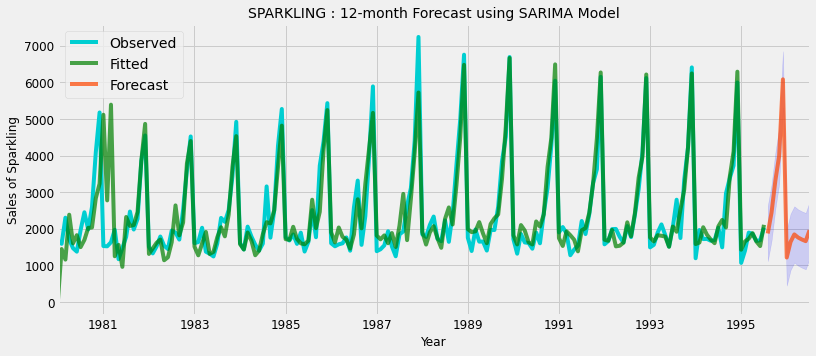

In [506]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,5))

axis = df['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12-month Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show();

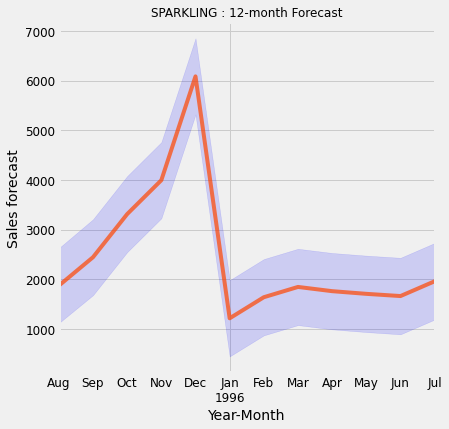

In [507]:
plt.figure(figsize=(6,6))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12-month Forecast', fontsize=12);

In [508]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1873.32
1995-09-30    2445.13
1995-10-31    3312.74
1995-11-30    3994.66
1995-12-31    6084.20
1996-01-31    1216.28
1996-02-29    1640.58
1996-03-31    1847.34
1996-04-30    1762.21
1996-05-31    1708.40
1996-06-30    1663.96
1996-07-31    1961.46

In [509]:
forecast.describe()

Sparkling
count    12.000000
mean   2459.190000
std    1384.631728
min    1216.280000
25%    1697.290000
50%    1860.330000
75%    2662.032500
max    6084.200000

In [510]:
forecast.sum()

Sparkling    29510.28
dtype: float64